This notebook is for testing the version of inter slice with evaluation of beta and dividing by 2 the inter pi

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/home/federico/Università/Tesi_magistrale/my_programs/')

from contact_matrix_utils import *
import settings
from src.slice_pairwise import *
from src.interchromosomal_cosegregation import *
from src.slice_pairwise_inter_beta_evaluation import *
from numpy.random import Generator, MT19937
from scipy.stats import pearsonr, spearmanr

In [2]:
def chromosome_bin_lenght(segregation_table, chrom):
    return np.ceil(segregation_table[chrom]['stop_position'][-1]/resolution).astype(int)

In [3]:
which_beta = "$\\beta$ evaluated "

In [4]:
def select_chromosomes_coordinates(chrA, chrB, chr_windows_sizes):
    if(chrA==0 or chrB ==0):
        print("0 is not accepted as chromosome index ")
        return

    chrA_idx, chrB_idx = chrA - 1, chrB - 1

    if(chrA_idx>chrB_idx):
        chrA_idx, chrB_idx = chrB_idx, chrA_idx

    start_row    = np.sum(chr_windows_sizes[:chrA_idx])
    stop_row     = start_row + chr_windows_sizes[chrA_idx]
    start_column = np.sum(chr_windows_sizes[:chrB_idx])
    stop_column  = start_column + chr_windows_sizes[chrB_idx]

    return start_row, stop_row, start_column, stop_column

# $\pi$ genomewide matrix import #

In [5]:
name_root_3NP_1Mb = "iza-mesc_1Mb_420x3"

path_1 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_3NP_1Mb + "/"
file_name_1 = "segregation_" + name_root_3NP_1Mb +  ".pkl"
with open(path_1 + file_name_1, 'rb') as f:
    segregation_table_3NP_1Mb = pickle.load(f)

In [6]:
name_root_1NP_1Mb = "mesc_46C_1Mb_481x1"

path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_1NP_1Mb + "/"
file_name_2 = "segregation_" + name_root_1NP_1Mb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f:
    segregation_table_1NP_1Mb = pickle.load(f)

In [7]:
start_chr, stop_chr = 1, 19
stop_chr += 1
chromosomes = []
n_chromosomes = stop_chr - start_chr

l = []
size = 0

for i in range(start_chr, stop_chr):
    chrA = 'chr' + str(i)
    chromosomes += [chrA]
    s = segregation_table_3NP_1Mb[chrA]['segregation_table'].shape[0]
    size += s
    l.append(s) 

chr_windows_sizes = np.array(l)


In [8]:
gw_PI_3NP_1Mb = np.zeros((size, size))
gw_PI_95_significant_3NP_1Mb = np.zeros((size, size))

for i in range(n_chromosomes):
    for j in range(i, n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        if(chrA!=chrB):
            gw_PI_3NP_1Mb[start_row:stop_row, start_column:stop_column] = np.load(data_path + name_root_3NP_1Mb + "/PI2_inter_beta_evaluation/" + "PI2_inter_" +  chrA + "_" + chrB + "_" + name_root_3NP_1Mb + ".npy")
            gw_PI_95_significant_3NP_1Mb[start_row:stop_row, start_column:stop_column] = np.load(data_path + name_root_3NP_1Mb + "/PI2_inter_beta_evaluation/" + "PI2_inter_significant_95_" +  chrA + "_" + chrB + "_" + name_root_3NP_1Mb + ".npy")
        else:
            gw_PI_3NP_1Mb[start_row:stop_row, start_column:stop_column] = squareform(np.loadtxt(data_path + name_root_3NP_1Mb + "/PI2/" + "PI2_" + chrA + "_" + name_root_3NP_1Mb + ".txt") )
            gw_PI_95_significant_3NP_1Mb[start_row:stop_row, start_column:stop_column] = squareform(np.loadtxt(data_path + name_root_3NP_1Mb + "/PI2/" + "PI2_significant_95_" + chrA + "_" + name_root_3NP_1Mb + ".txt") )

for i in range(gw_PI_3NP_1Mb.shape[0]):
    for j in range(gw_PI_3NP_1Mb.shape[1]):
        gw_PI_3NP_1Mb[j,i] = gw_PI_3NP_1Mb[i,j]
        gw_PI_95_significant_3NP_1Mb[j,i] = gw_PI_95_significant_3NP_1Mb[i, j] 

In [9]:
gw_PI_1NP_1Mb = np.zeros((size, size))
gw_PI_95_significant_1NP_1Mb = np.zeros((size, size))

for i in range(n_chromosomes):
    for j in range(i, n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        if(chrA!=chrB):
            gw_PI_1NP_1Mb[start_row:stop_row, start_column:stop_column] = np.load(data_path + name_root_1NP_1Mb + "/PI2_inter_beta_evaluation/" + "PI2_inter_" +  chrA + "_" + chrB + "_" + name_root_1NP_1Mb + ".npy")
            gw_PI_95_significant_1NP_1Mb[start_row:stop_row, start_column:stop_column] = np.load(data_path + name_root_1NP_1Mb + "/PI2_inter_beta_evaluation/" + "PI2_inter_significant_95_" +  chrA + "_" + chrB + "_" + name_root_1NP_1Mb + ".npy")
        else:
            gw_PI_1NP_1Mb[start_row:stop_row, start_column:stop_column] = squareform(np.loadtxt(data_path + name_root_1NP_1Mb + "/PI2/" + "PI2_" + chrA + "_" + name_root_1NP_1Mb + ".txt") )
            gw_PI_95_significant_1NP_1Mb[start_row:stop_row, start_column:stop_column] = squareform(np.loadtxt(data_path + name_root_1NP_1Mb + "/PI2/" + "PI2_significant_95_" + chrA + "_" + name_root_1NP_1Mb + ".txt") )

for i in range(gw_PI_1NP_1Mb.shape[0]):
    for j in range(gw_PI_1NP_1Mb.shape[1]):
        gw_PI_1NP_1Mb[j,i] = gw_PI_1NP_1Mb[i,j]
        gw_PI_95_significant_1NP_1Mb[j,i] = gw_PI_95_significant_1NP_1Mb[i, j] 

# Mean $\pi$ per chromosome couple 3NP #

In [9]:
PI_means_3NP_1Mb = np.zeros((19,19))
PI_significant_means_3NP_1Mb   = np.zeros((19,19))

PI_means_3NP_1Mb_nonzero = np.zeros((19,19))
PI_significant_means_3NP_1Mb_nonzero   = np.zeros((19,19))

In [10]:
for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        
        PI_means_3NP_1Mb[i, j] = np.nanmean(gw_PI_3NP_1Mb[start_row:stop_row, start_column:stop_column])
        PI_significant_means_3NP_1Mb[i, j]   = np.nanmean(gw_PI_95_significant_3NP_1Mb[start_row:stop_row, start_column:stop_column])
    
        temp_1 = np.copy(gw_PI_3NP_1Mb[start_row:stop_row, start_column:stop_column])
        temp_1[temp_1== 0] = np.nan
        temp_2 = np.copy(gw_PI_95_significant_3NP_1Mb[start_row:stop_row, start_column:stop_column])
        temp_2[temp_2== 0] = np.nan
        


        PI_means_3NP_1Mb_nonzero[i, j] = np.nanmean( temp_1  )
        PI_significant_means_3NP_1Mb_nonzero[i, j]   = np.nanmean( temp_2  )
del temp_1, temp_2

PI_means_3NP_1Mb_nonzero = np.nan_to_num(PI_means_3NP_1Mb_nonzero, 0)
PI_significant_means_3NP_1Mb_nonzero = np.nan_to_num(PI_significant_means_3NP_1Mb_nonzero, 0)

/home/federico/Università/Tesi_magistrale/my_programs/contact_matrix_utils.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);


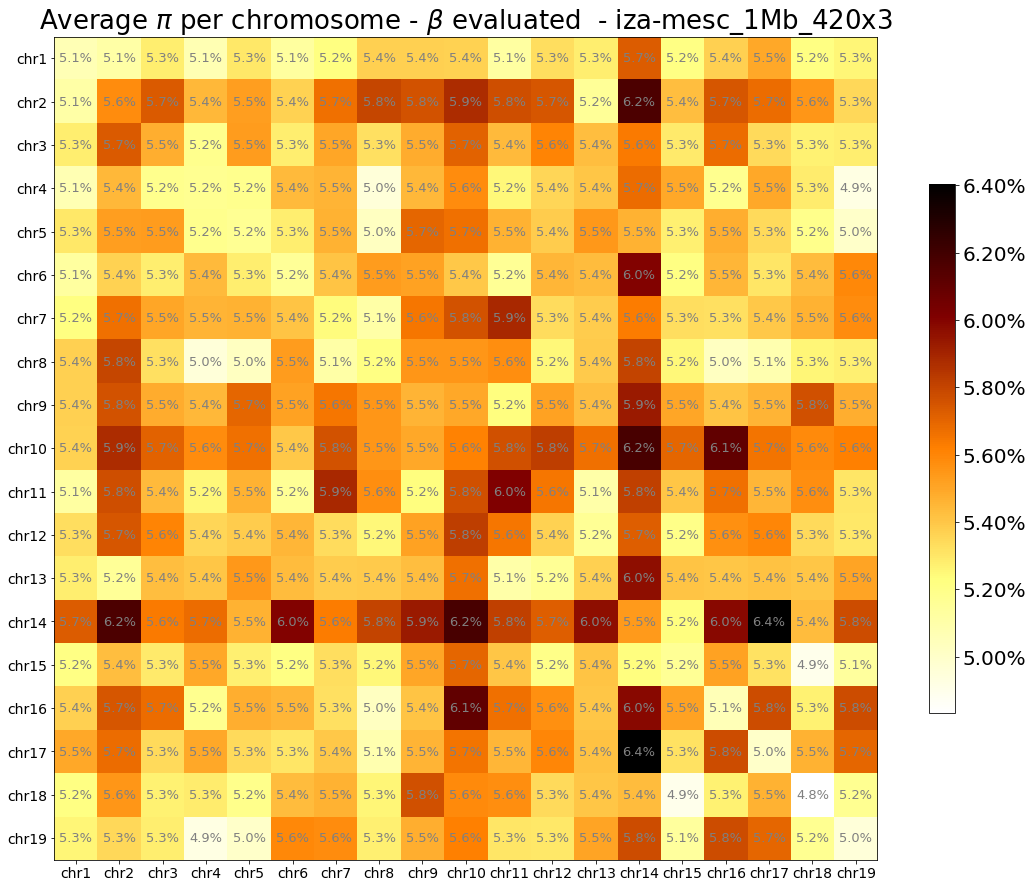

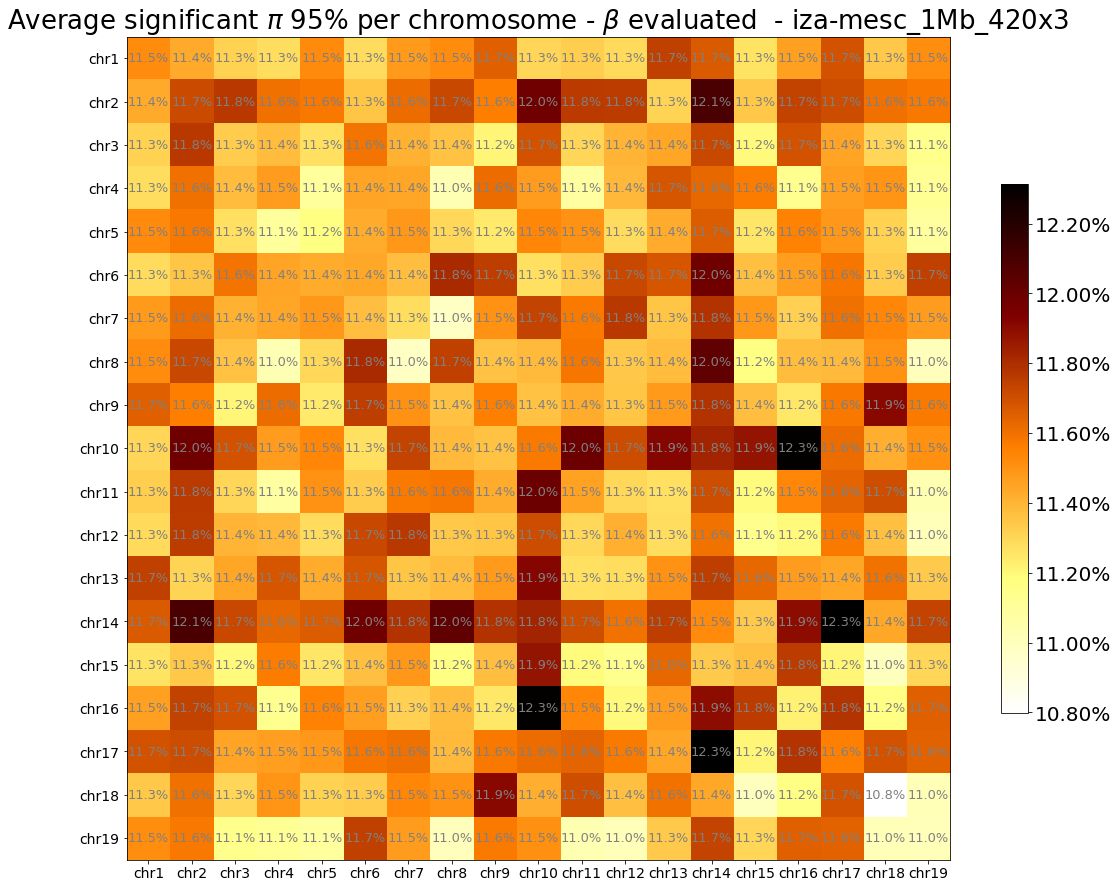

In [18]:
fig, ax, c = plot_heatmap(PI_means_3NP_1Mb_nonzero, x_figsize= 15, y_figsize= 15, percent=True)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, str(np.around(PI_means_3NP_1Mb_nonzero[i, j]*100, decimals=1)) + "%",
                       ha="center", va="center", color="grey", fontsize = 13)

ax.set_title("Average $\pi$ per chromosome - " + which_beta + " - " + name_root_3NP_1Mb, fontsize = 26)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
c.ax.tick_params(axis='y', which='major', labelsize=20)


fig, ax, c = plot_heatmap(PI_significant_means_3NP_1Mb_nonzero, x_figsize= 15, y_figsize= 15, percent=True)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, str(np.around(PI_significant_means_3NP_1Mb_nonzero[i, j]*100, decimals=1)) + "%",
                       ha="center", va="center", color="grey", fontsize = 13)

ax.set_title("Average significant $\pi$ 95% per chromosome - " + which_beta + " - " + name_root_3NP_1Mb, fontsize = 26)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
c.ax.tick_params(axis='y', which='major', labelsize=20)


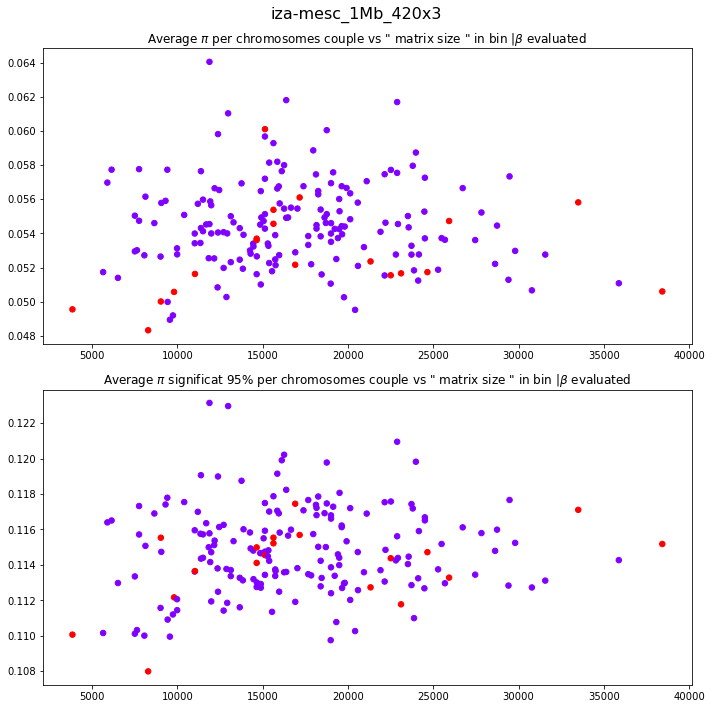

In [12]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

x_1 = []
y_1 = []
y_2 = []
diagonal_labels = []


for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(PI_means_3NP_1Mb_nonzero[i,j])
            y_2.append(PI_significant_means_3NP_1Mb_nonzero[i,j])

            if(i == j):
                diagonal_labels.append(1)
            else:
                diagonal_labels.append(0)




chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1, y_2, diagonal_labels]).T, columns=['x', 'y1', 'y2', 'colour'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


ax[0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 1], s = 30, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')
ax[1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 2], s = 30, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')

ax[0].set_title("Average $\pi$ per chromosomes couple vs \" matrix size \" in bin |" + which_beta)
ax[1].set_title("Average $\pi$ significat 95% per chromosomes couple vs \" matrix size \" in bin |" + which_beta)

#ax[1].set_ylim([0.1,0.12])

fig.suptitle(name_root_3NP_1Mb, fontsize=16)

fig.tight_layout()

del fig, ax, x_1, y_1, y_2, diagonal_labels, chr_interaction_vs_lenght 


# Mean $\pi$ per chromosome couple 1NP #

In [11]:
PI_means_1NP_1Mb = np.zeros((19,19))
PI_significant_means_1NP_1Mb   = np.zeros((19,19))

PI_means_1NP_1Mb_nonzero = np.zeros((19,19))
PI_significant_means_1NP_1Mb_nonzero   = np.zeros((19,19))

In [12]:
for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        
        PI_means_1NP_1Mb[i, j] = np.nanmean(gw_PI_1NP_1Mb[start_row:stop_row, start_column:stop_column])
        PI_significant_means_1NP_1Mb[i, j]   = np.nanmean(gw_PI_95_significant_1NP_1Mb[start_row:stop_row, start_column:stop_column])
    
        temp_1 = np.copy(gw_PI_1NP_1Mb[start_row:stop_row, start_column:stop_column])
        temp_1[temp_1== 0] = np.nan
        temp_2 = np.copy(gw_PI_95_significant_1NP_1Mb[start_row:stop_row, start_column:stop_column])
        temp_2[temp_2== 0] = np.nan
        


        PI_means_1NP_1Mb_nonzero[i, j] = np.nanmean( temp_1  )
        PI_significant_means_1NP_1Mb_nonzero[i, j]   = np.nanmean( temp_2  )
del temp_1, temp_2

PI_means_1NP_1Mb_nonzero = np.nan_to_num(PI_means_1NP_1Mb_nonzero, 0)
PI_significant_means_1NP_1Mb_nonzero = np.nan_to_num(PI_significant_means_1NP_1Mb_nonzero, 0)

/home/federico/Università/Tesi_magistrale/my_programs/contact_matrix_utils.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);


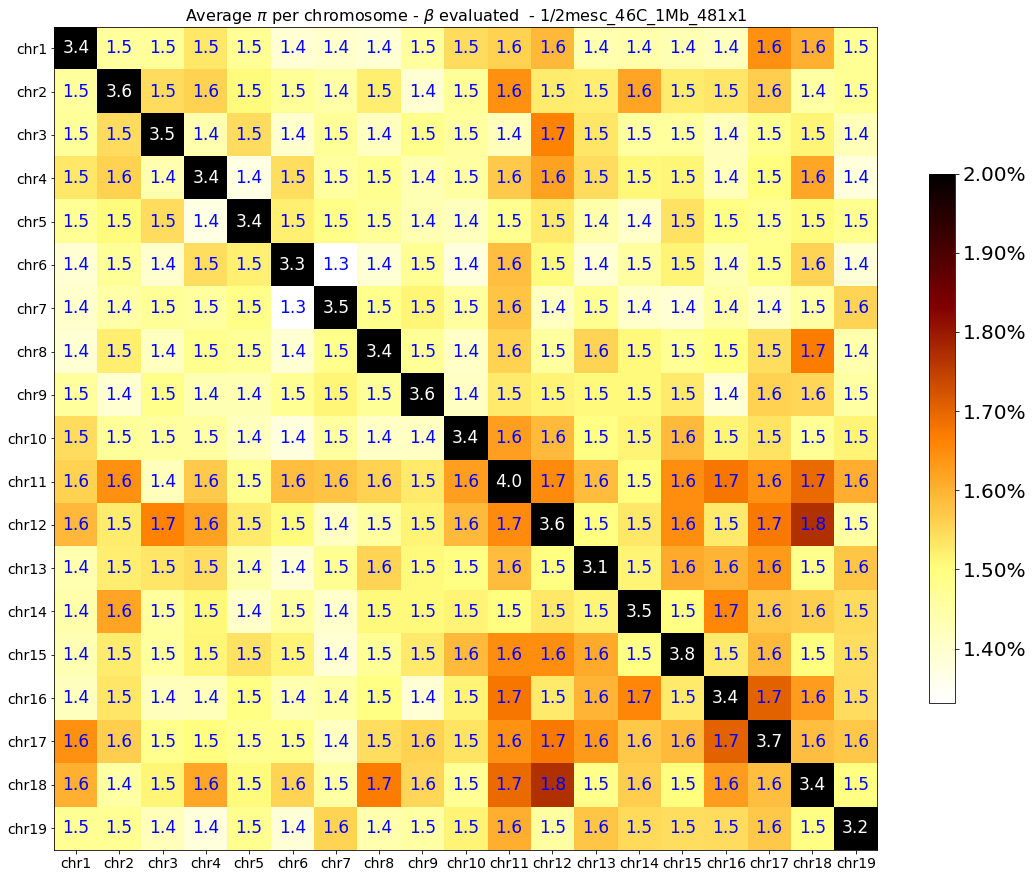

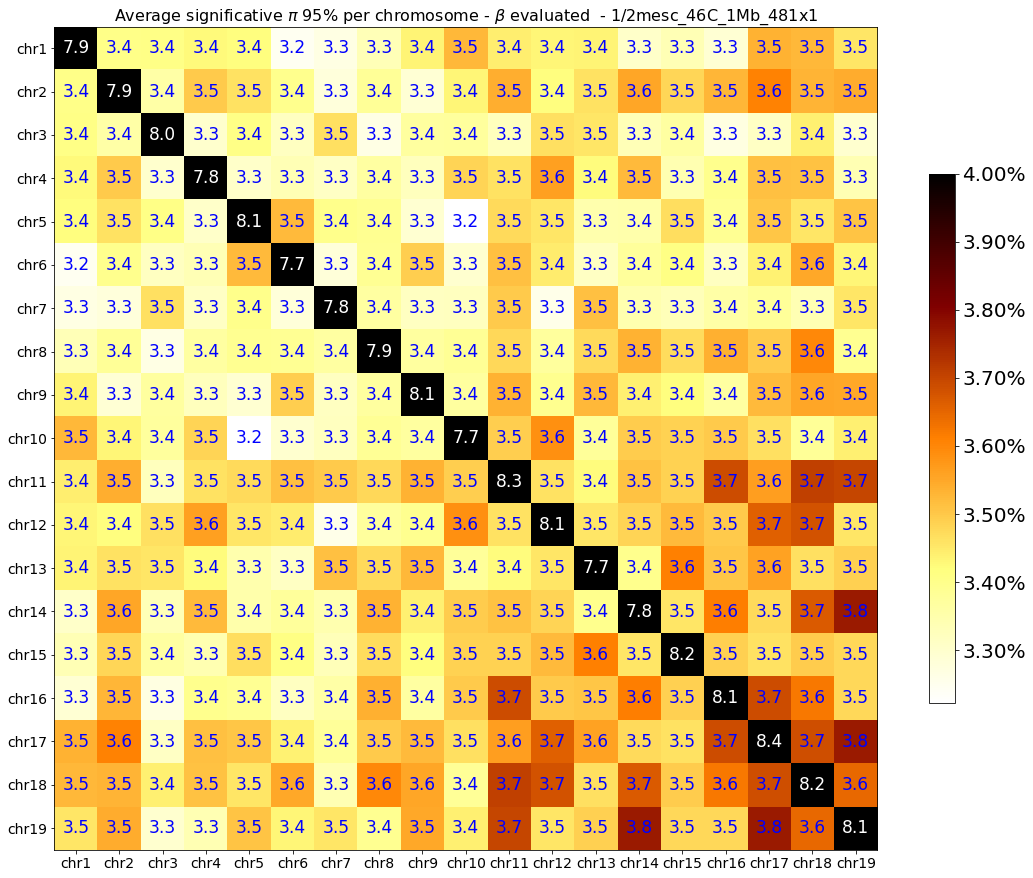

In [13]:
fig, ax, c, _ = plot_heatmap(PI_means_1NP_1Mb_nonzero, x_figsize= 15, y_figsize= 15, vmin = np.min(PI_means_1NP_1Mb_nonzero), vmax = 0.02, percent=True)

for i in range(19):
    for j in range(19):
        if(i == j):
            text = ax.text(j, i, str(np.around(PI_means_1NP_1Mb_nonzero[i, j]*100, decimals=1)),
                        ha="center", va="center", color="white", fontsize = 17)
        else:
            text = ax.text(j, i, str(np.around(PI_means_1NP_1Mb_nonzero[i, j]*100, decimals=1)),
                        ha="center", va="center", color="blue", fontsize = 17)

ax.set_title("Average $\pi$ per chromosome - " + which_beta + " - 1/2" + name_root_1NP_1Mb, fontsize = 16)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
c.ax.tick_params(axis='y', which='major', labelsize=20)

fig, ax, c, _ = plot_heatmap(PI_significant_means_1NP_1Mb_nonzero,  x_figsize= 15, y_figsize= 15, vmin = np.min(PI_significant_means_1NP_1Mb_nonzero), vmax = 0.04, percent=True)

for i in range(19):
    for j in range(19):
        if(i==j):
            text = ax.text(j, i, str(np.around(PI_significant_means_1NP_1Mb_nonzero[i, j]*100, decimals=1)),
                        ha="center", va="center", color="white", fontsize = 17)

        else:
            text = ax.text(j, i, str(np.around(PI_significant_means_1NP_1Mb_nonzero[i, j]*100, decimals=1)),
                        ha="center", va="center", color="blue", fontsize = 17)
        


ax.set_title("Average significative $\pi$ 95% per chromosome - " + which_beta + " - 1/2" + name_root_1NP_1Mb, fontsize = 16)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
c.ax.tick_params(axis='y', which='major', labelsize=20)


## stats ##

In [21]:
temp_1 = squareform(PI_means_1NP_1Mb_nonzero, checks=False)
temp_2 = squareform(PI_significant_means_1NP_1Mb_nonzero, checks=False)

print("Mean of average pi in intra: ", np.mean( np.diagonal(PI_means_1NP_1Mb_nonzero) ) * 100)
print("std of average pi in intra: ", np.std( np.diagonal(PI_means_1NP_1Mb_nonzero) )* 100)

print("Mean of average significant pi in intra: ", np.mean( np.diagonal(PI_significant_means_1NP_1Mb_nonzero) )* 100)
print("std of average significant pi in intra: ", np.std( np.diagonal(PI_significant_means_1NP_1Mb_nonzero) )* 100)

print("Mean of average pi in inter: ", np.mean( temp_1)* 100 )
print("std of average pi in inter: ", np.std( temp_1) * 100)

print("Mean of average significant pi in inter: ", np.mean( temp_2) * 100)
print("std of average significant pi in inter: ", np.std( temp_2)* 100 )

del temp_1, temp_2


Mean of average pi in intra:  3.4847689454510133
std of average pi in intra:  0.1909411397937758
Mean of average significant pi in intra:  7.9978397230530325
std of average significant pi in intra:  0.19597969579220378
Mean of average pi in inter:  1.508305950192724
std of average pi in inter:  0.07851594133549211
Mean of average significant pi in inter:  3.4475119011564535
std of average significant pi in inter:  0.10727317452567857


## scatterplot ##

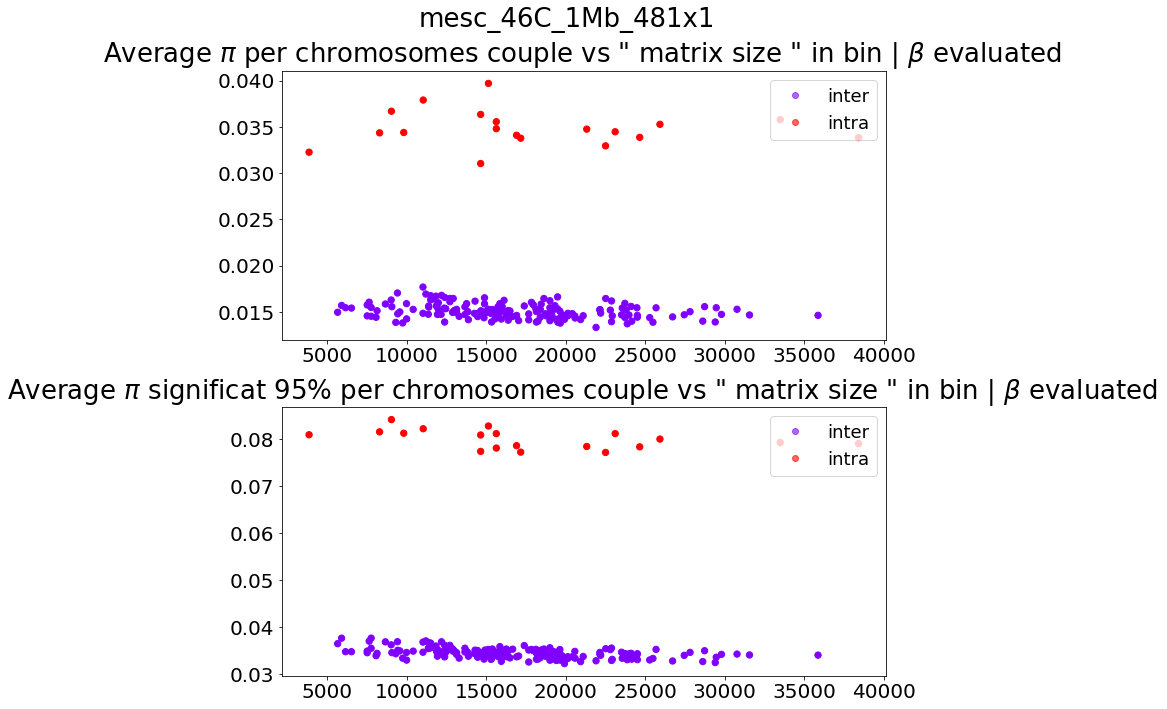

In [13]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

x_1 = []
y_1 = []
y_2 = []
diagonal_labels = []

for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(PI_means_1NP_1Mb_nonzero[i,j])
            y_2.append(PI_significant_means_1NP_1Mb_nonzero[i,j])
            if(i == j):
                diagonal_labels.append(1)
            else:
                diagonal_labels.append(0)



chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1, y_2, diagonal_labels]).T, columns=['x', 'y1', 'y2', 'color'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


scatter_0 = ax[0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 1], s = 40, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')
scatter_1 = ax[1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 2], s = 40, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')

ax[0].set_title("Average $\pi$ per chromosomes couple vs \" matrix size \" in bin | " + which_beta, fontsize = 26)
ax[1].set_title("Average $\pi$ significat 95% per chromosomes couple vs \" matrix size \" in bin | " + which_beta, fontsize = 26)

ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

handles_0, _ = scatter_0.legend_elements(prop="colors", alpha=0.6)
ax[0].legend(handles_0, ['inter', 'intra'], loc="upper right", fontsize = 18)

handles_1, _ = scatter_1.legend_elements(prop="colors", alpha=0.6)
ax[1].legend(handles_1, ['inter', 'intra'], loc="upper right", fontsize = 18)

fig.suptitle(name_root_1NP_1Mb, fontsize=26)

fig.tight_layout()

del fig, ax, x_1, y_1, y_2, diagonal_labels, chr_interaction_vs_lenght 


# $\beta$ + 1/2 #

## 1 NP ##

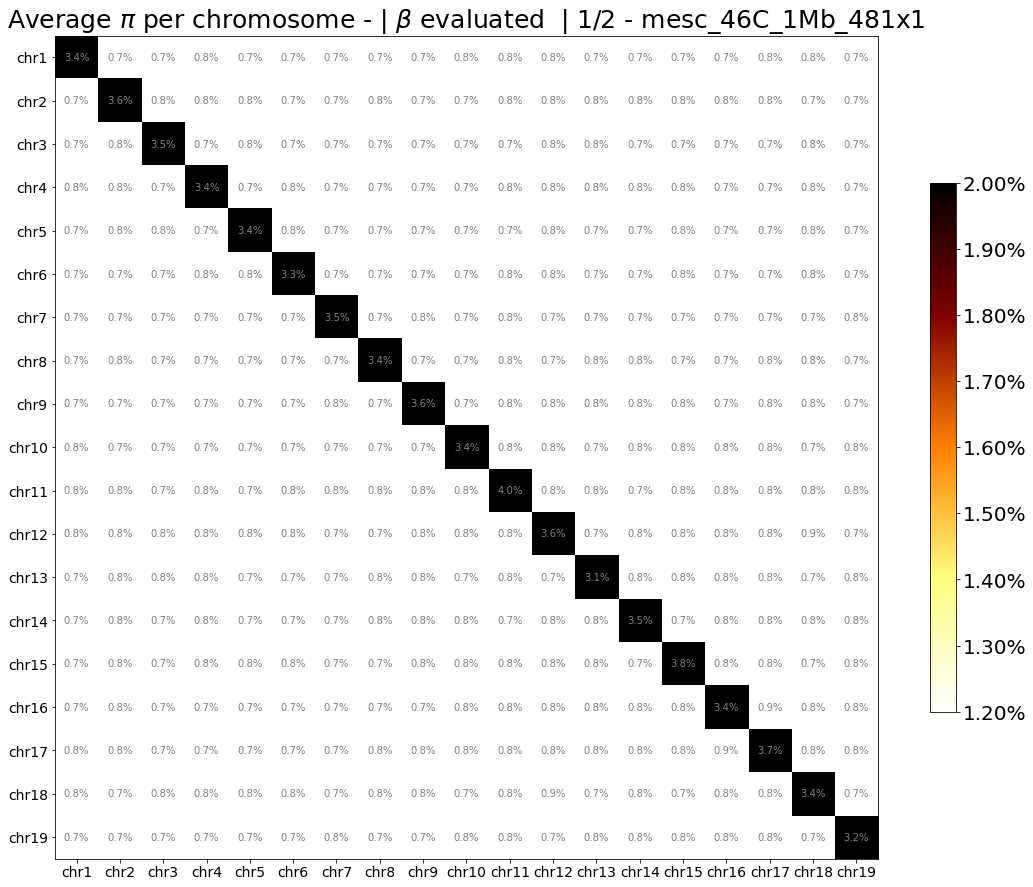

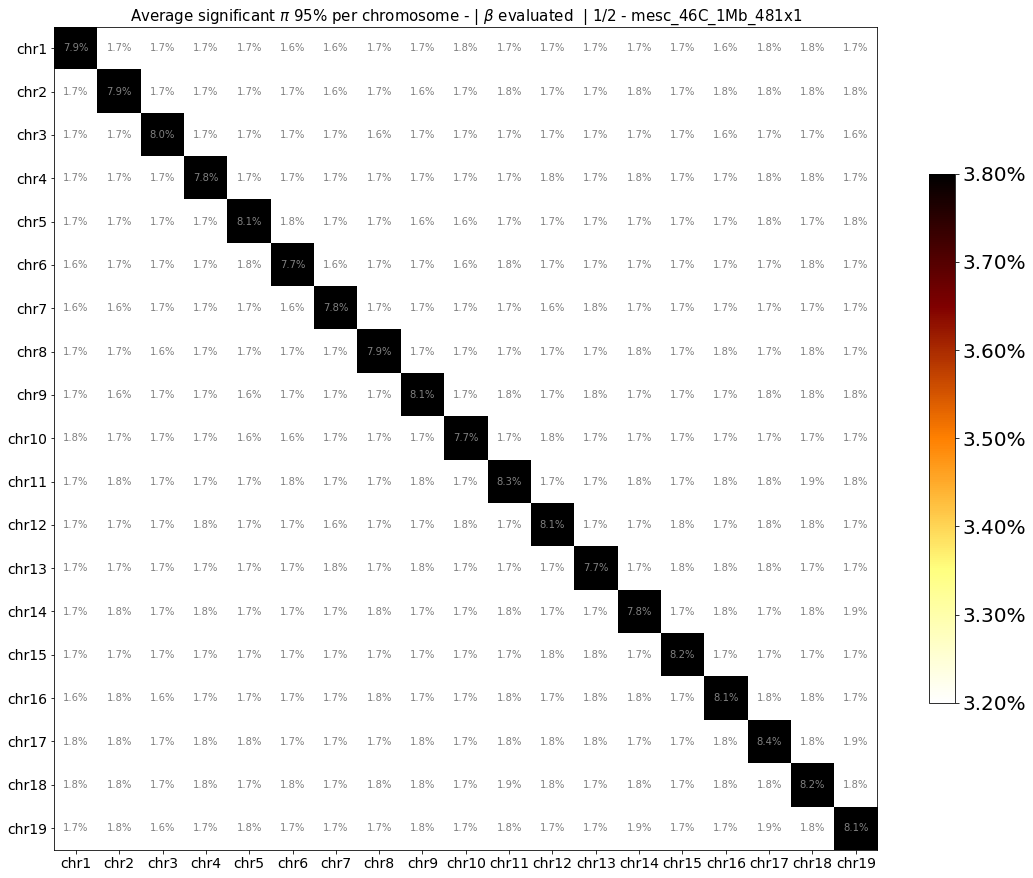

In [14]:
PI_means_1NP_1Mb_nonzero_half = np.copy(PI_means_1NP_1Mb_nonzero)
PI_significant_means_1NP_1Mb_nonzero_half = np.copy(PI_significant_means_1NP_1Mb_nonzero)

for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        if(i!=j):
            PI_means_1NP_1Mb_nonzero_half[i,j] /= 2 
            PI_significant_means_1NP_1Mb_nonzero_half[i,j] /= 2

fig, ax, c, _ = plot_heatmap(PI_means_1NP_1Mb_nonzero_half, x_figsize= 15, y_figsize= 15, vmin = 0.012, vmax = 0.02, percent=True)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, str(np.around(PI_means_1NP_1Mb_nonzero_half[i, j]*100, decimals=1)) + "%",
                       ha="center", va="center", color="grey")

ax.set_title("Average $\pi$ per chromosome - | " + which_beta + " | 1/2 - " + name_root_1NP_1Mb, fontsize = 25)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);


c.ax.tick_params(axis='y', which='major', labelsize=20)


fig1, ax1, c1, _ = plot_heatmap(PI_significant_means_1NP_1Mb_nonzero_half, x_figsize= 15, y_figsize= 15, vmin = 0.032, vmax = 0.038, percent=True)

for i in range(19):
    for j in range(19):
        text = ax1.text(j, i, str(np.around(PI_significant_means_1NP_1Mb_nonzero_half[i, j]*100, decimals=1)) + "%",
                       ha="center", va="center", color="grey")

ax1.set_title("Average significant $\pi$ 95% per chromosome - | " + which_beta + " | 1/2 - " + name_root_1NP_1Mb, fontsize = 15)
fig1.tight_layout()
ax1.set_xticks(np.arange(0,19, 1))
ax1.set_yticks(np.arange(0,19, 1))
ax1.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
ax1.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 14);
c1.ax.tick_params(axis='y', which='major', labelsize=20)


del fig, ax, fig1, ax1

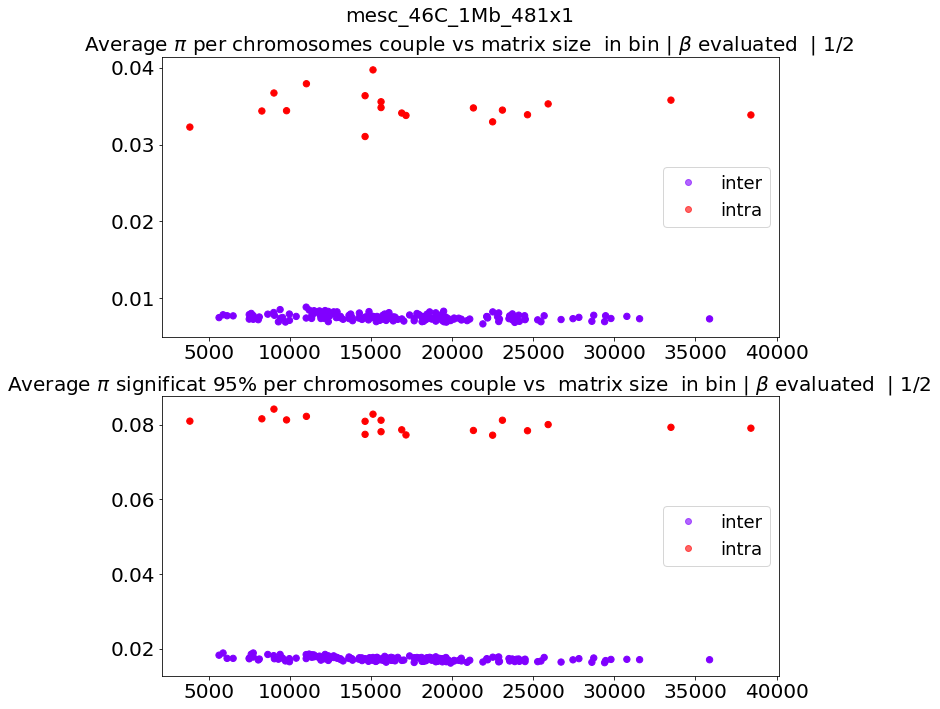

In [15]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

x_1 = []
y_1 = []
y_2 = []
diagonal_labels = []

for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(PI_means_1NP_1Mb_nonzero_half[i,j])
            y_2.append(PI_significant_means_1NP_1Mb_nonzero_half[i,j])
            if(i == j):
                diagonal_labels.append(1)
            else:
                diagonal_labels.append(0)



chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1, y_2, diagonal_labels]).T, columns=['x', 'y1', 'y2', 'color'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


scatter_0 = ax[0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 1], s = 40, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')
scatter_1 = ax[1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 2], s = 40, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')

ax[0].set_title("Average $\pi$ per chromosomes couple vs matrix size  in bin | " + which_beta + " | 1/2 ", fontsize=20)
ax[1].set_title("Average $\pi$ significat 95% per chromosomes couple vs  matrix size  in bin | " + which_beta + " | 1/2 ", fontsize=20)

ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

handles_0, _ = scatter_0.legend_elements(prop="colors", alpha=0.6)
ax[0].legend(handles_0, ['inter', 'intra'], loc="right", fontsize = 18)

handles_1, _ = scatter_1.legend_elements(prop="colors", alpha=0.6)
ax[1].legend(handles_1, ['inter', 'intra'], loc="right", fontsize = 18)

fig.suptitle(name_root_1NP_1Mb, fontsize=20)

fig.tight_layout()

del fig, ax, x_1, y_1, y_2, diagonal_labels, chr_interaction_vs_lenght 


## 3NP ##

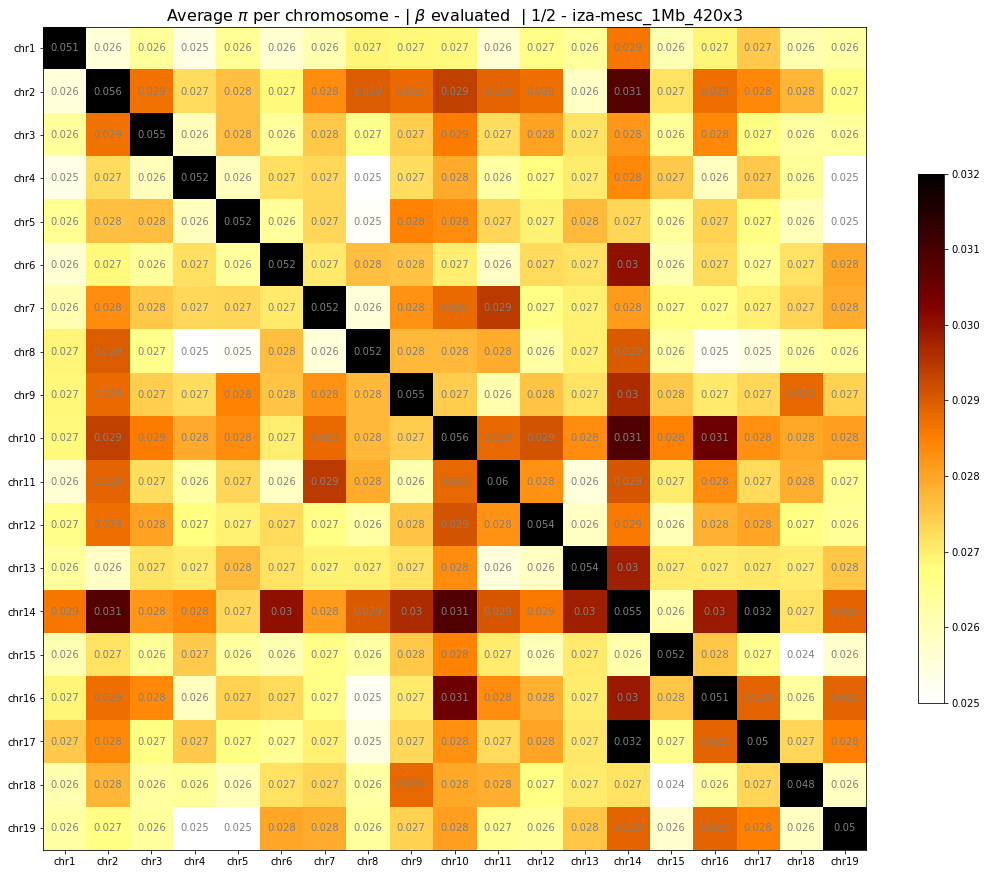

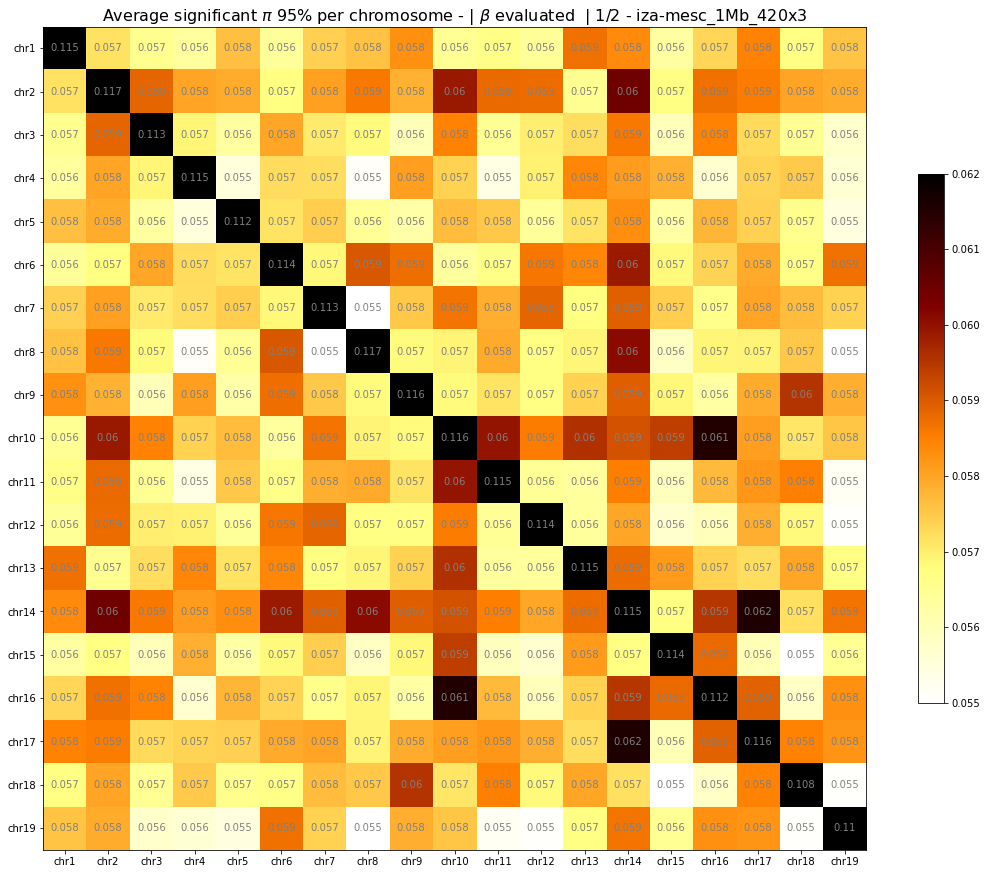

In [33]:
PI_means_3NP_1Mb_nonzero_half = np.copy(PI_means_3NP_1Mb_nonzero)
PI_significant_means_3NP_1Mb_nonzero_half = np.copy(PI_significant_means_3NP_1Mb_nonzero)

for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        if(i!=j):
            PI_means_3NP_1Mb_nonzero_half[i,j] /= 2 
            PI_significant_means_3NP_1Mb_nonzero_half[i,j] /= 2

fig, ax = plot_heatmap(PI_means_3NP_1Mb_nonzero_half, x_figsize= 15, y_figsize= 15,  vmin = 0.025, vmax= 0.032)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, np.around(PI_means_3NP_1Mb_nonzero_half[i, j], decimals=3),
                       ha="center", va="center", color="grey")

ax.set_title("Average $\pi$ per chromosome - | " + which_beta + " | 1/2 - " + name_root_3NP_1Mb, fontsize = 16)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);


fig1, ax1 = plot_heatmap(PI_significant_means_3NP_1Mb_nonzero_half, x_figsize= 15, y_figsize= 15,  vmin = 0.055, vmax= 0.062)

for i in range(19):
    for j in range(19):
        text = ax1.text(j, i, np.around(PI_significant_means_3NP_1Mb_nonzero_half[i, j], decimals=3),
                       ha="center", va="center", color="grey")

ax1.set_title("Average significant $\pi$ 95% per chromosome - | " + which_beta + " | 1/2 - " + name_root_3NP_1Mb, fontsize = 16)
fig1.tight_layout()
ax1.set_xticks(np.arange(0,19, 1))
ax1.set_yticks(np.arange(0,19, 1))
ax1.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax1.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);

del fig, ax, fig1, ax1

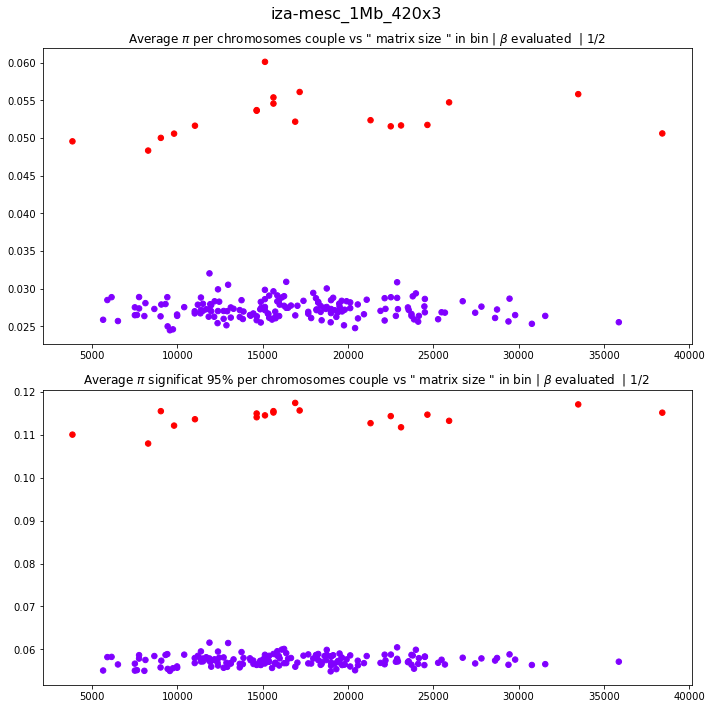

In [20]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

x_1 = []
y_1 = []
y_2 = []
diagonal_labels = []

for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(PI_means_3NP_1Mb_nonzero_half[i,j])
            y_2.append(PI_significant_means_3NP_1Mb_nonzero_half[i,j])
            if(i == j):
                diagonal_labels.append(1)
            else:
                diagonal_labels.append(0)



chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1, y_2, diagonal_labels]).T, columns=['x', 'y1', 'y2', 'color'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


ax[0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 1], s = 30, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')
ax[1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 2], s = 30, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')

ax[0].set_title("Average $\pi$ per chromosomes couple vs \" matrix size \" in bin | " + which_beta + " | 1/2 ")
ax[1].set_title("Average $\pi$ significat 95% per chromosomes couple vs \" matrix size \" in bin | " + which_beta + " | 1/2 ")

fig.suptitle(name_root_3NP_1Mb, fontsize=16)

fig.tight_layout()

del fig, ax, x_1, y_1, y_2, diagonal_labels, chr_interaction_vs_lenght 


----------------

# insigth into pi matrices #

## chr 19-18 ##

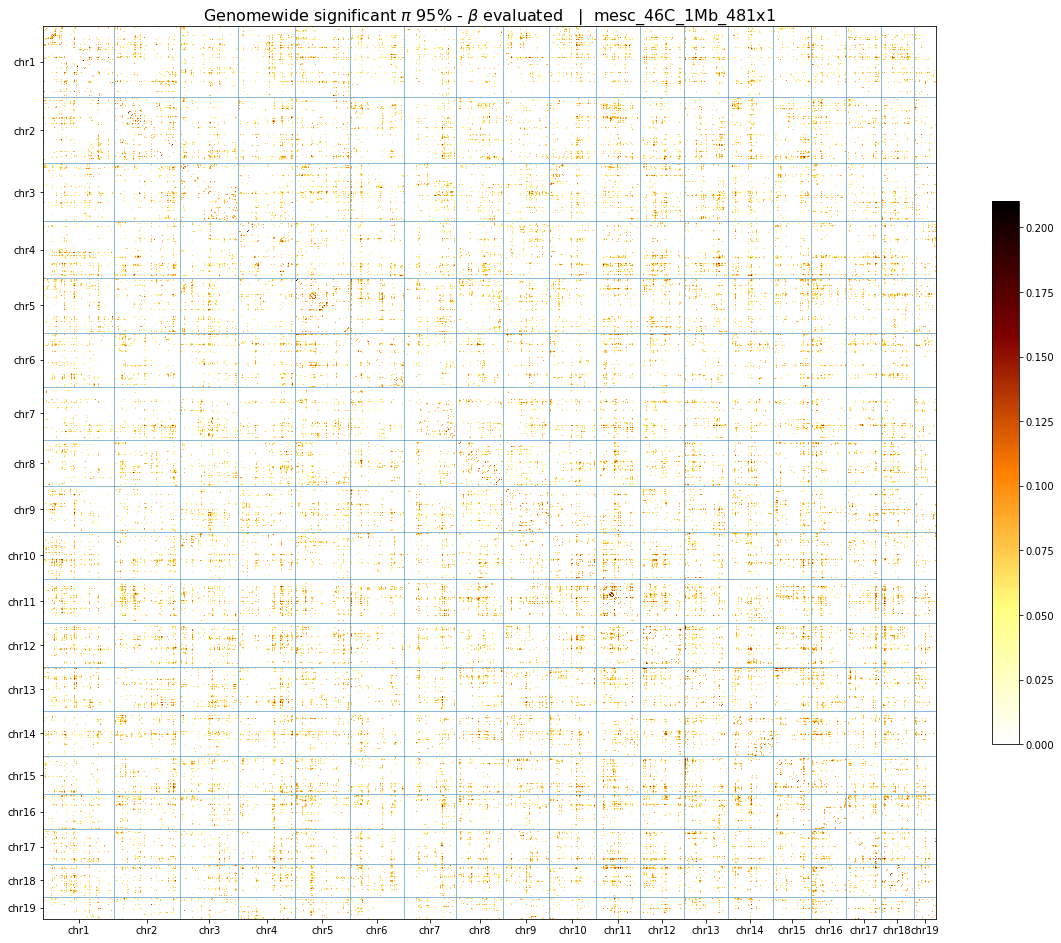

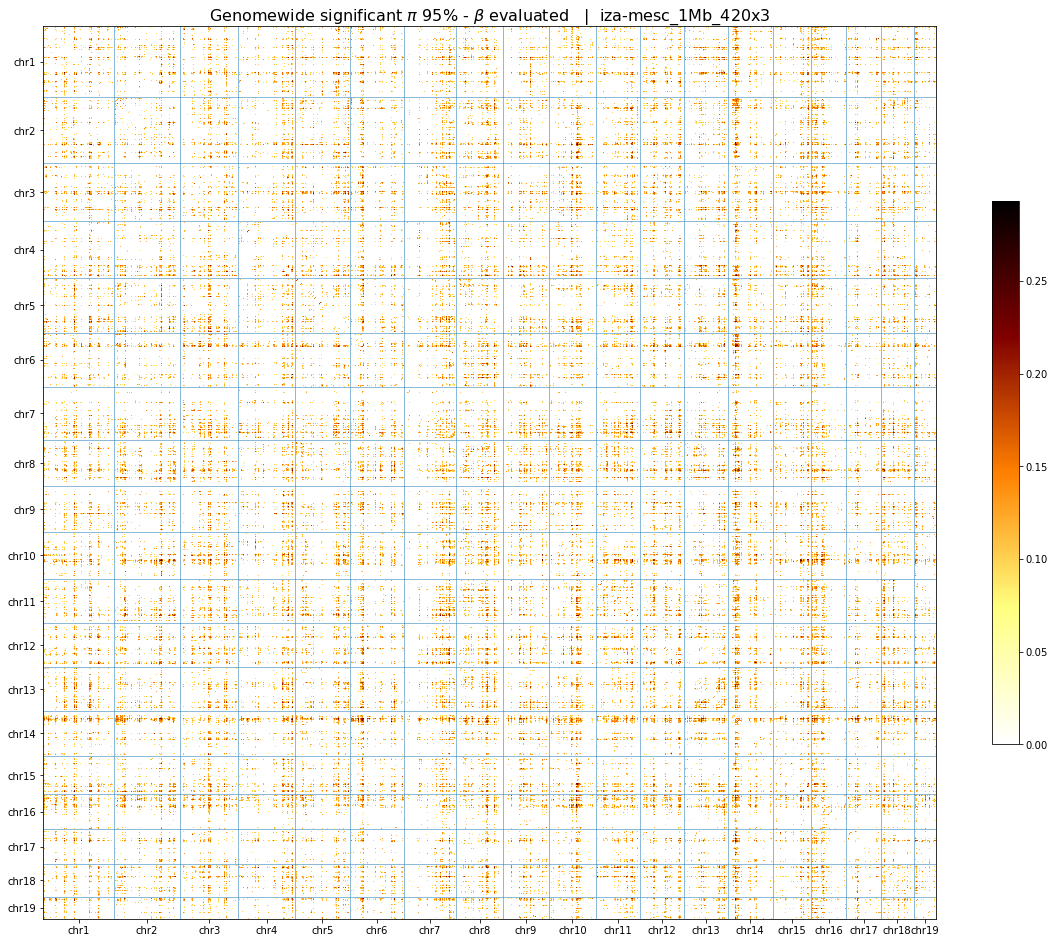

In [34]:
fig_1, ax_1 = plot_heatmap(gw_PI_95_significant_1NP_1Mb, x_figsize=20, y_figsize=20)



for i in np.cumsum(chr_windows_sizes)[:-1]:
    ax_1.axhline(i, linewidth = 0.5);
    ax_1.axvline(i, linewidth = 0.5);

labels_positions =  []
for i in range(1, n_chromosomes):
    labels_positions.append(  np.sum(chr_windows_sizes[:i]) - int(chr_windows_sizes[i-1]/2)   )
labels_positions.append(np.sum(chr_windows_sizes) - int(chr_windows_sizes[18]/2))


ax_1.set_xticks(labels_positions)
ax_1.set_yticks(labels_positions)
ax_1.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax_1.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax_1.set_title("Genomewide significant $\pi$ 95% - " + which_beta + "  |  " +  name_root_1NP_1Mb, fontsize=16);

fig_2, ax_2 = plot_heatmap(gw_PI_95_significant_3NP_1Mb, x_figsize=20, y_figsize=20)

for i in np.cumsum(chr_windows_sizes)[:-1]:
    ax_2.axhline(i, linewidth = 0.5);
    ax_2.axvline(i, linewidth = 0.5);

ax_2.set_xticks(labels_positions)
ax_2.set_yticks(labels_positions)
ax_2.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax_2.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax_2.set_title("Genomewide significant $\pi$ 95% - " + which_beta + "  |  " +  name_root_3NP_1Mb, fontsize=16);

del fig_1, fig_2, ax_1, ax_2, labels_positions

nei 3NP si possono vedere delle strisce molto pronunciate: come quella che coinvolge la prima metà del cromosoma 14, provo a capirla meglio

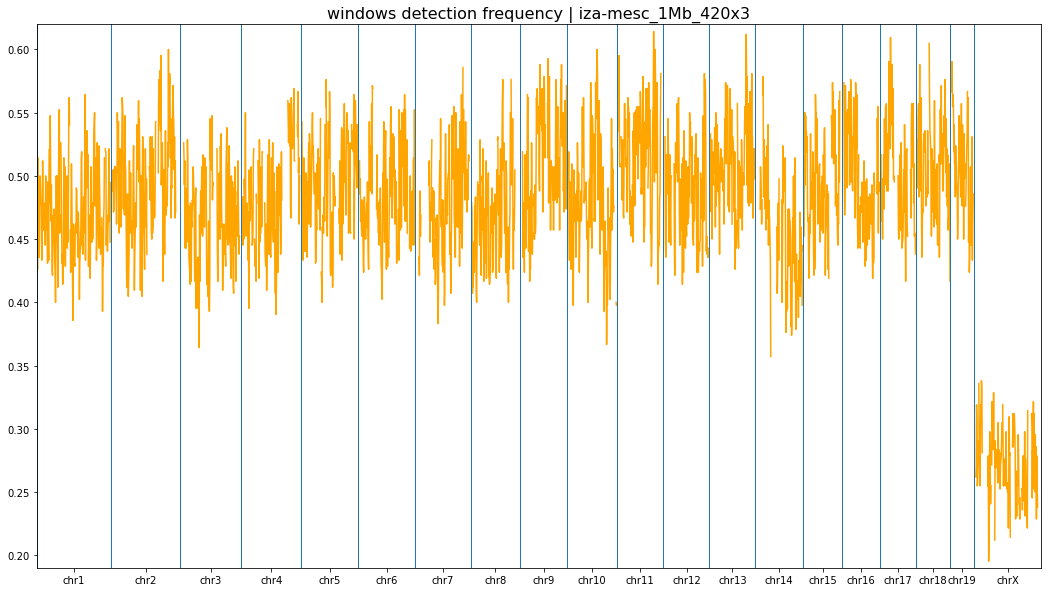

In [54]:
F_arr_genomewide_3NP_1Mb = np.array([])
chr_list = list(dict({"chr1": 1, "chr2": 2, "chr3": 3, "chr4": 4,
                             "chr5": 5, "chr6": 6, "chr7": 7, "chr8": 8,
                             "chr9": 9, "chr10": 10, "chr11": 11, "chr12": 12,
                             "chr13": 13, "chr14": 14, "chr15": 15, "chr16": 16,
                             "chr17": 17, "chr18": 18, "chr19": 19, "chrX": -1}).keys())

# For each chromosome, compute F_arr and store it in F_arr_genomewide
for chr in chr_list:
    segregation_table = segregation_table_3NP_1Mb[chr]["segregation_table"]
    F_arr = compute_tube_segregation_frequency(segregation_table)
    F_arr_genomewide_3NP_1Mb = np.concatenate((F_arr_genomewide_3NP_1Mb, F_arr))
    del F_arr

fig, ax = plt.subplots(figsize = (18,10))
ax.plot(F_arr_genomewide_3NP_1Mb, color = 'orange')
ax.set_xlim((0,2650 ) )
ax.set_title("windows detection frequency | " + name_root_3NP_1Mb, fontsize = 16)

ax.axvline(0, linewidth = 1);
for i in np.cumsum(chr_windows_sizes):
    ax.axvline(i, linewidth = 1);
labels_positions = []
for i in range(1, n_chromosomes):
    labels_positions.append(  np.sum(chr_windows_sizes[:i]) - int(chr_windows_sizes[i-1]/2))
labels_positions.append(np.sum(chr_windows_sizes) - int(chr_windows_sizes[18]/2))
labels_positions.append(labels_positions[-1] + 120)

ax.set_xticks(labels_positions)
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chrX']);
ax.set_ylim((0.19,0.62 ) )


del F_arr_genomewide_3NP_1Mb, fig, ax, labels_positions

(150, 2473)
0.4876928549197457


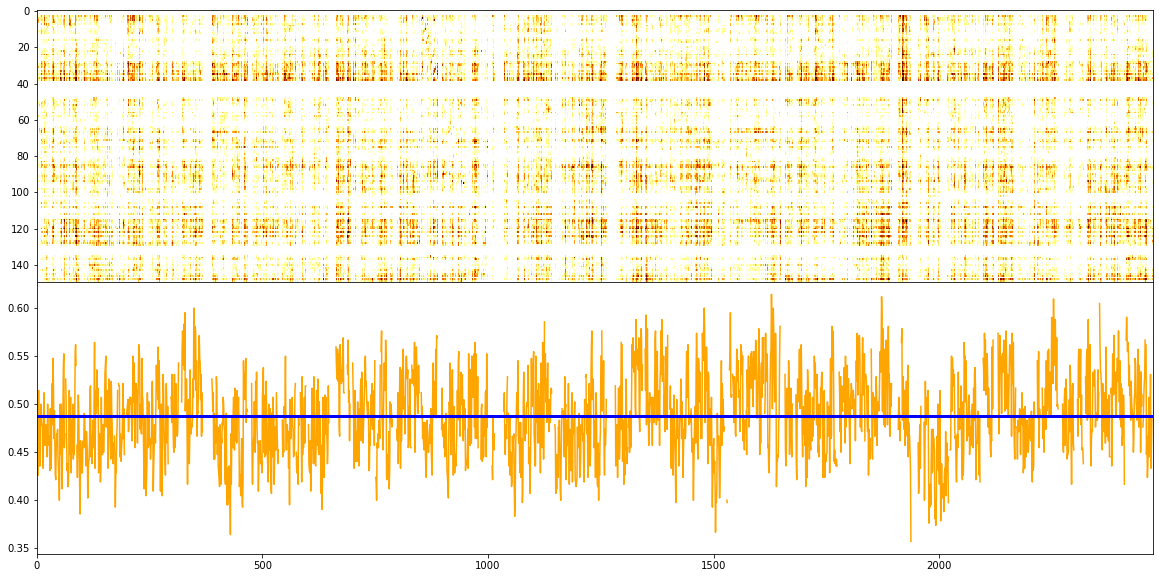

In [151]:
fig, ax = plt.subplots(2, 1, figsize = (20,10), sharex = True)

F_arr_genomewide_3NP_1Mb = np.array([])

#start_row    = np.sum(chr_windows_sizes[:i])
start_row    = np.sum(chr_windows_sizes[:5])
stop_row     = start_row + chr_windows_sizes[5]

start_column = 0
stop_column  = np.sum(chr_windows_sizes[:18]) + chr_windows_sizes[18]

print(gw_PI_3NP_1Mb[start_row:stop_row, start_column:stop_column].shape)

ax[0].imshow(gw_PI_3NP_1Mb[start_row:stop_row, start_column:stop_column], cmap = 'afmhot_r', interpolation = 'nearest', aspect = 'auto')

# For each chromosome, compute F_arr and store it in F_arr_genomewide
for chr in chr_list:
    segregation_table = segregation_table_3NP_1Mb[chr]["segregation_table"]
    F_arr = compute_tube_segregation_frequency(segregation_table)
    F_arr_genomewide_3NP_1Mb = np.concatenate((F_arr_genomewide_3NP_1Mb, F_arr))
    del F_arr


ax[1].plot(F_arr_genomewide_3NP_1Mb[start_column:stop_column], color = 'orange')
ax[1].axhline(  np.nanmean(F_arr_genomewide_3NP_1Mb[start_column:stop_column]), color = 'blue', linewidth = 3)
print(np.nanmean(F_arr_genomewide_3NP_1Mb[start_column:stop_column]))
#ax[1].set_title("windows detection frequency | " + name_root_3NP_1Mb, fontsize = 16)
plt.subplots_adjust(wspace=0, hspace=0)
del fig, ax

# $F_{i,j} (F_i , F_j)$ #

In [152]:
path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_3NP_1Mb + "/"
file_name_2 = "segregation_" + name_root_3NP_1Mb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f_2:
    segregation_table_3NP = pickle.load(f_2)

gw_coseg_matrix_3NP_1Mb, gw_norm_link_disq_3NP_1Mb = compute_coseg_nld_genomewide(segregation_table_3NP, 1, 19)

gw_coseg_matrix_3NP_1Mb   = np.nan_to_num(gw_coseg_matrix_3NP_1Mb, nan=0)
gw_norm_link_disq_3NP_1Mb = np.nan_to_num(gw_norm_link_disq_3NP_1Mb, nan=0)


for i in range(gw_coseg_matrix_3NP_1Mb.shape[0]):
    for j in range(gw_coseg_matrix_3NP_1Mb.shape[1]):
        gw_coseg_matrix_3NP_1Mb[j,i]   = gw_coseg_matrix_3NP_1Mb[i,j]
        gw_norm_link_disq_3NP_1Mb[j,i] = gw_norm_link_disq_3NP_1Mb[i, j] 




In [178]:
#gw_PI_3NP_1Mb_nonan = np.nan_to_num(gw_PI_3NP_1Mb, nan=0)
#gw_PI_95_significant_3NP_1Mb_nonan = np.nan_to_num(gw_PI_95_significant_3NP_1Mb, nan=0)
s = gw_PI_3NP_1Mb.shape[0]
F_i_outer_Fj_3NP_1Mb = np.outer(F_arr_genomewide_3NP_1Mb[:s], F_arr_genomewide_3NP_1Mb[:s])
np.fill_diagonal(F_i_outer_Fj_3NP_1Mb,np.nan)
print("F_i x F_j vs pi: ", spearmanr(F_i_outer_Fj_3NP_1Mb.flatten(), gw_PI_3NP_1Mb.flatten(), nan_policy='omit')[0])
print("F_i x F_j vs significant pi: ", spearmanr(F_i_outer_Fj_3NP_1Mb.flatten(), gw_PI_95_significant_3NP_1Mb.flatten(), nan_policy='omit')[0])
#print("F_i x F_j vs coseg pi: ", spearmanr(F_i_outer_Fj_3NP_1Mb.flatten(), gw_coseg_matrix_3NP_1Mb.flatten(), nan_policy='omit')[0])
#print("F_i x F_j vs nld pi: ", spearmanr(F_i_outer_Fj_3NP_1Mb.flatten(), gw_norm_link_disq_3NP_1Mb.flatten(), nan_policy='omit')[0])


#del gw_PI_3NP_1Mb_nonan, gw_PI_95_significant_3NP_1Mb_nonan

KeyboardInterrupt: 

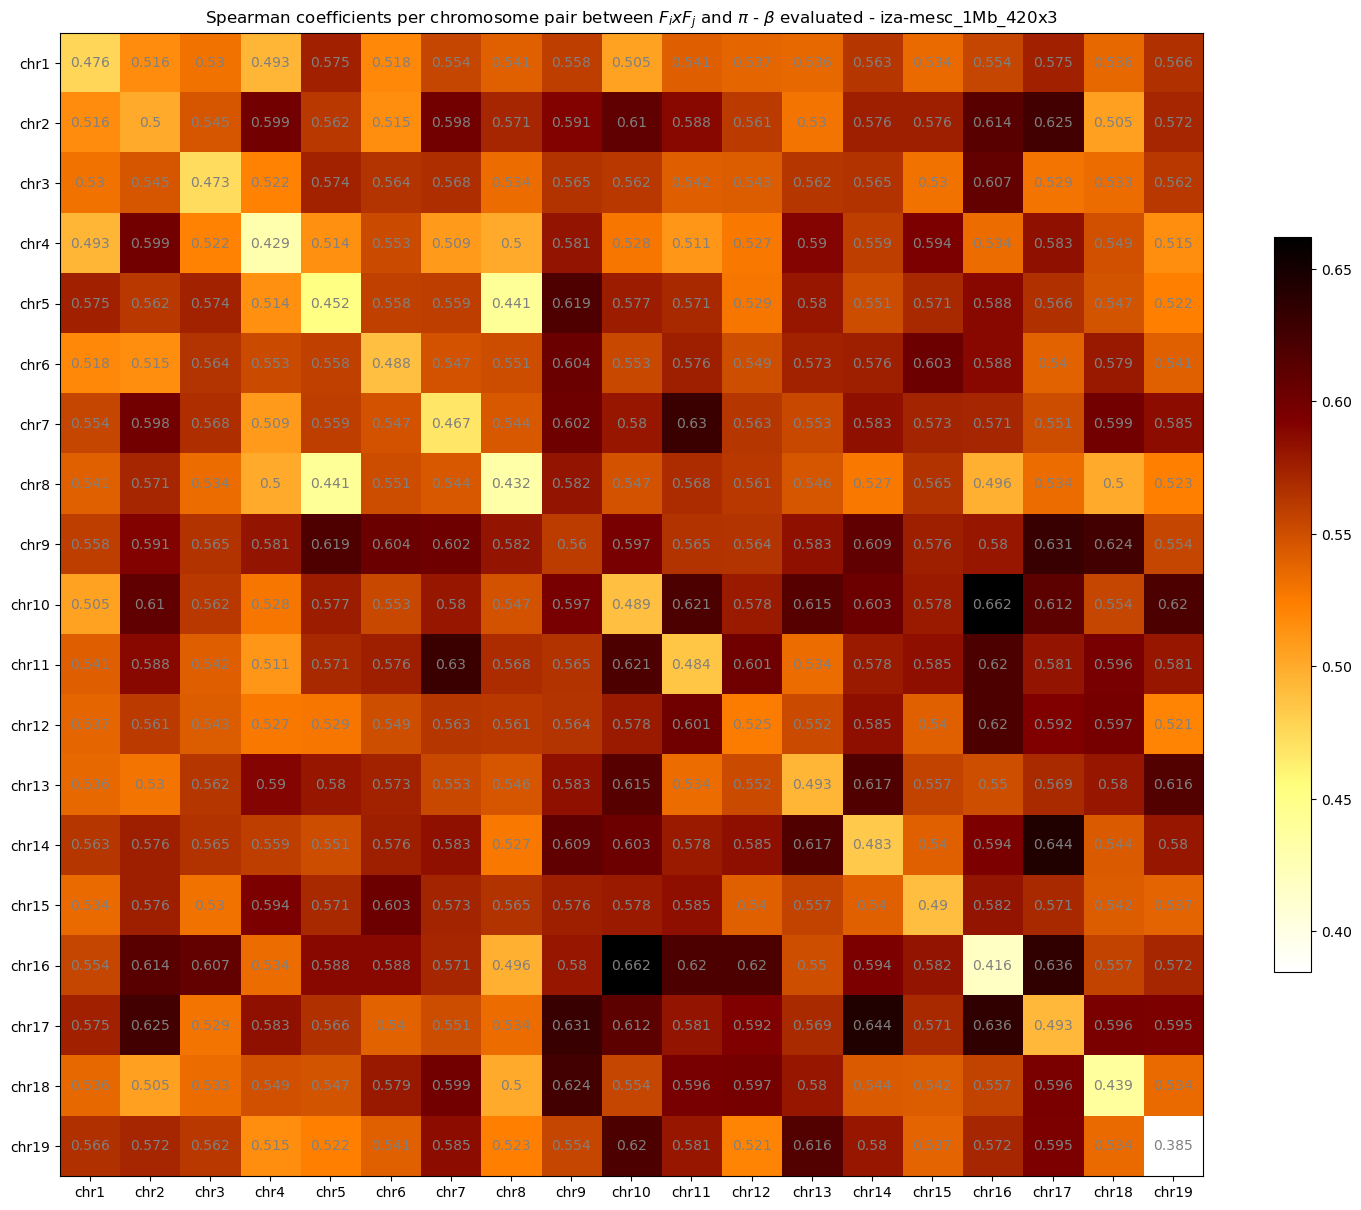

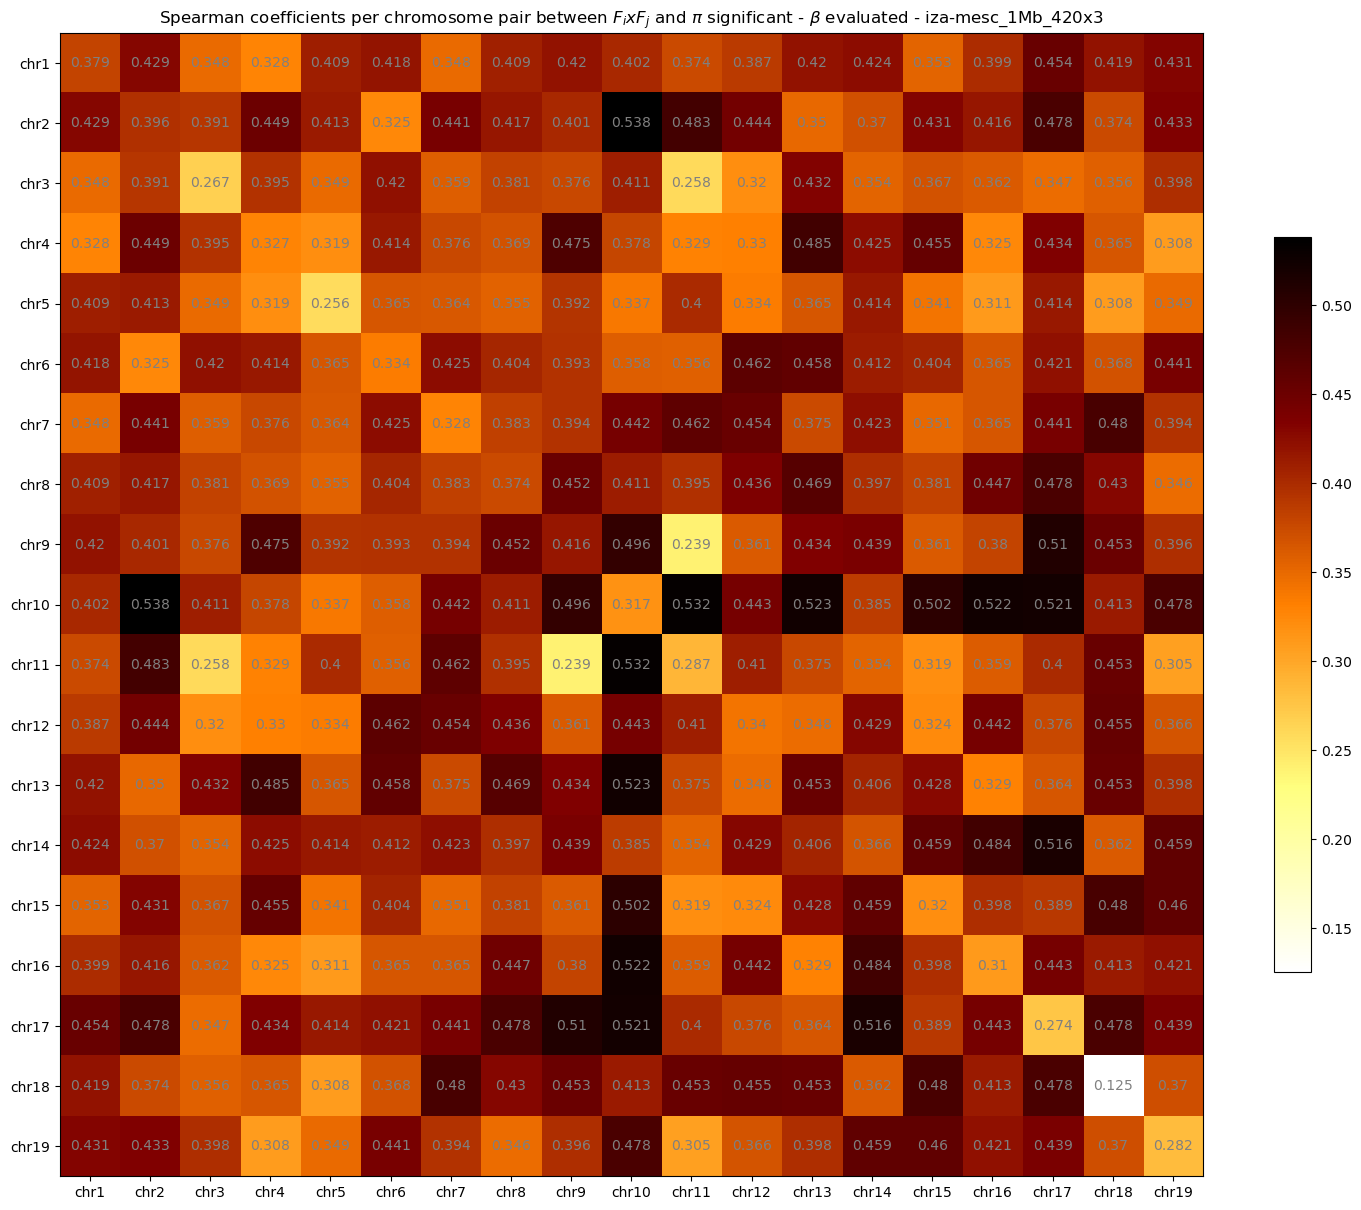

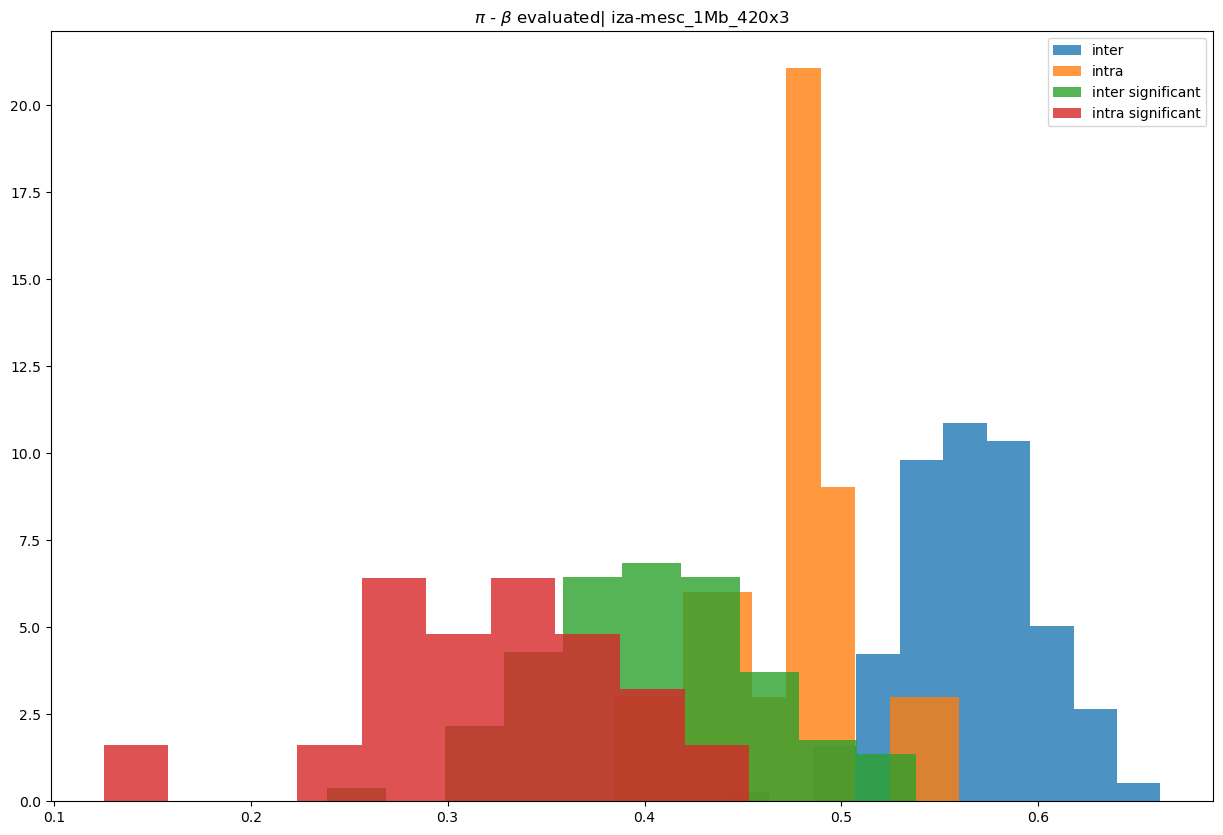

In [230]:
s = gw_PI_3NP_1Mb.shape[0]
F_i_outer_Fj_3NP_1Mb = np.outer(F_arr_genomewide_3NP_1Mb[:s], F_arr_genomewide_3NP_1Mb[:s])
np.fill_diagonal(F_i_outer_Fj_3NP_1Mb, np.nan)

gw_PI_3NP_1Mb_nozero = np.copy(gw_PI_3NP_1Mb)
gw_PI_3NP_1Mb_nozero[gw_PI_3NP_1Mb == 0] = np.nan

gw_PI_95_significant_3NP_1Mb_nozero = np.copy(gw_PI_95_significant_3NP_1Mb)
gw_PI_95_significant_3NP_1Mb_nozero[gw_PI_95_significant_3NP_1Mb == 0] = np.nan

spearmans = np.zeros((19,19))
significant_spearmans = np.zeros((19,19))
#spearmans = np.zeros((19,19))

for i in tqdm(range(n_chromosomes), leave = False):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]

        spearmans[i, j] = spearmanr(F_i_outer_Fj_3NP_1Mb[start_row:stop_row, start_column:stop_column].flatten(), gw_PI_3NP_1Mb_nozero[start_row:stop_row, start_column:stop_column].flatten(), nan_policy='omit')[0]
        significant_spearmans[i, j] = spearmanr(F_i_outer_Fj_3NP_1Mb[start_row:stop_row, start_column:stop_column].flatten(), gw_PI_95_significant_3NP_1Mb_nozero[start_row:stop_row, start_column:stop_column].flatten(), nan_policy='omit')[0]
        

#del F_i_outer_Fj_3NP_1Mb

fig, ax = plot_heatmap(spearmans, x_figsize= 15, y_figsize= 15)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, np.around(spearmans[i, j], decimals=3),
                       ha="center", va="center", color="grey")

ax.set_title("Spearman coefficients per chromosome pair between $F_i x F_j$ and $\pi$ - " + which_beta + " - " + name_root_3NP_1Mb)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);

fig1, ax1 = plot_heatmap(significant_spearmans, x_figsize= 15, y_figsize= 15)

for i in range(19):
    for j in range(19):
        text = ax1.text(j, i, np.around(significant_spearmans[i, j], decimals=3),
                       ha="center", va="center", color="grey")

ax1.set_title("Spearman coefficients per chromosome pair between $F_i x F_j$ and $\pi$ significant - " + which_beta + " - " + name_root_3NP_1Mb)
fig1.tight_layout()
ax1.set_xticks(np.arange(0,19, 1))
ax1.set_yticks(np.arange(0,19, 1))
ax1.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax1.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);


del fig, ax, fig1, ax1


from scipy.spatial.distance import squareform

off_diag_spearmans = np.copy(spearmans)
np.fill_diagonal(off_diag_spearmans, 0)

off_diag_significant_spearmans = np.copy(significant_spearmans)
np.fill_diagonal(off_diag_significant_spearmans, 0)



fig, ax = plt.subplots(figsize = (15,10))
#ax.hist(np.diagonal(spearmans));
ax.hist(squareform(off_diag_spearmans), density=True, alpha = 0.8, label = "inter");
ax.hist(np.diagonal(spearmans), density=True, alpha = 0.8, label = "intra");
ax.legend();
ax.set_title("$\pi$ - " + which_beta +  " | "+ name_root_3NP_1Mb);

#fig1, ax1 = plt.subplots(figsize = (10,10))
#ax.hist(np.diagonal(spearmans));
ax.hist(squareform(off_diag_significant_spearmans), density=True, alpha = 0.8, label = "inter significant");
ax.hist(np.diagonal(significant_spearmans), density=True, alpha = 0.8, label = "intra significant");
ax.legend();
#ax.set_title("significant $\pi$ 95% - $\\beta$ evaluated| "+ name_root_3NP_1Mb)

del off_diag_spearmans, off_diag_significant_spearmans


## Medie delle F_i_outer_F_j in 3NP ##

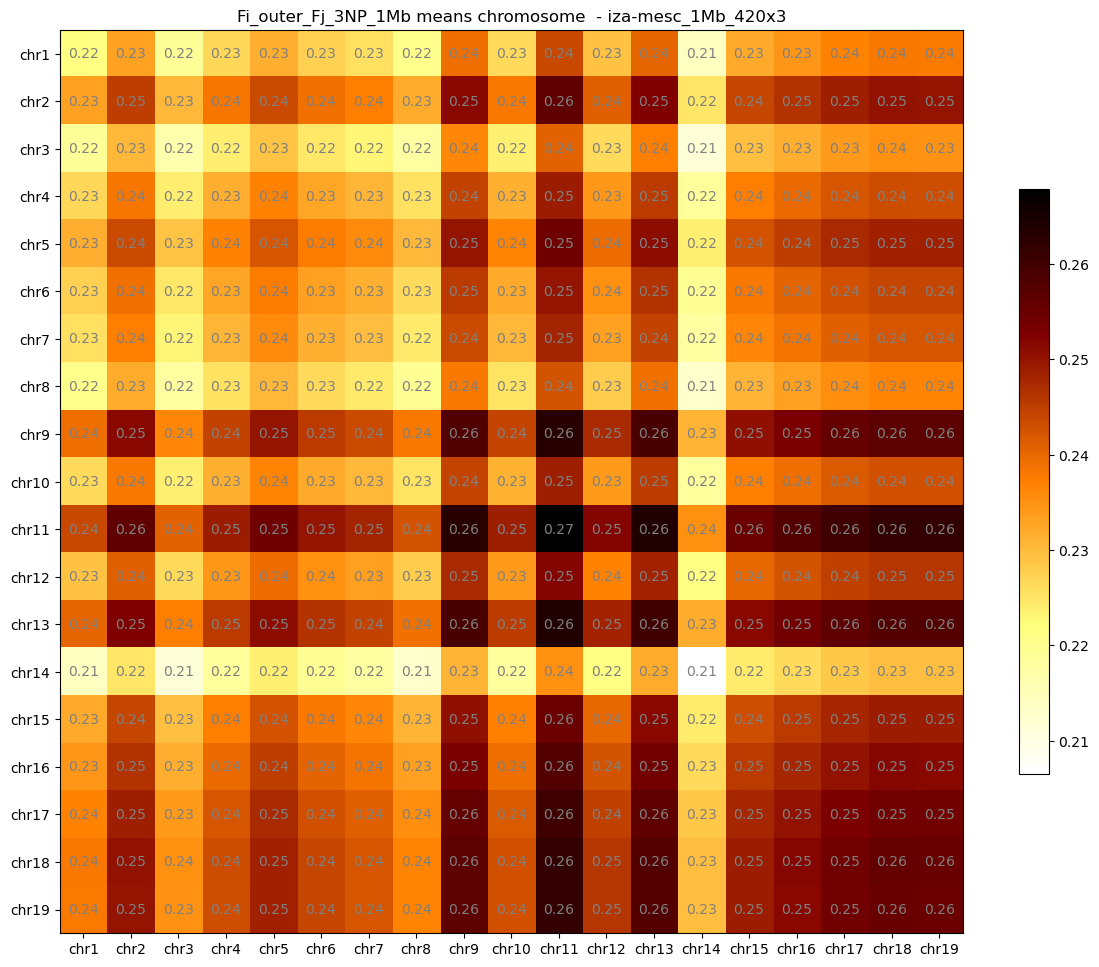

In [245]:
outer_means = np.zeros((19,19))

for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        
        outer_means[i, j] = np.nanmean(F_i_outer_Fj_3NP_1Mb[start_row:stop_row, start_column:stop_column])
    

fig, ax = plot_heatmap(outer_means, x_figsize= 12, y_figsize= 12)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, np.around(outer_means[i, j], decimals=2),
                       ha="center", va="center", color="grey")

ax.set_title("Fi_outer_Fj_3NP_1Mb means per chromosome couple " + " - " + name_root_3NP_1Mb)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);

del fig, ax

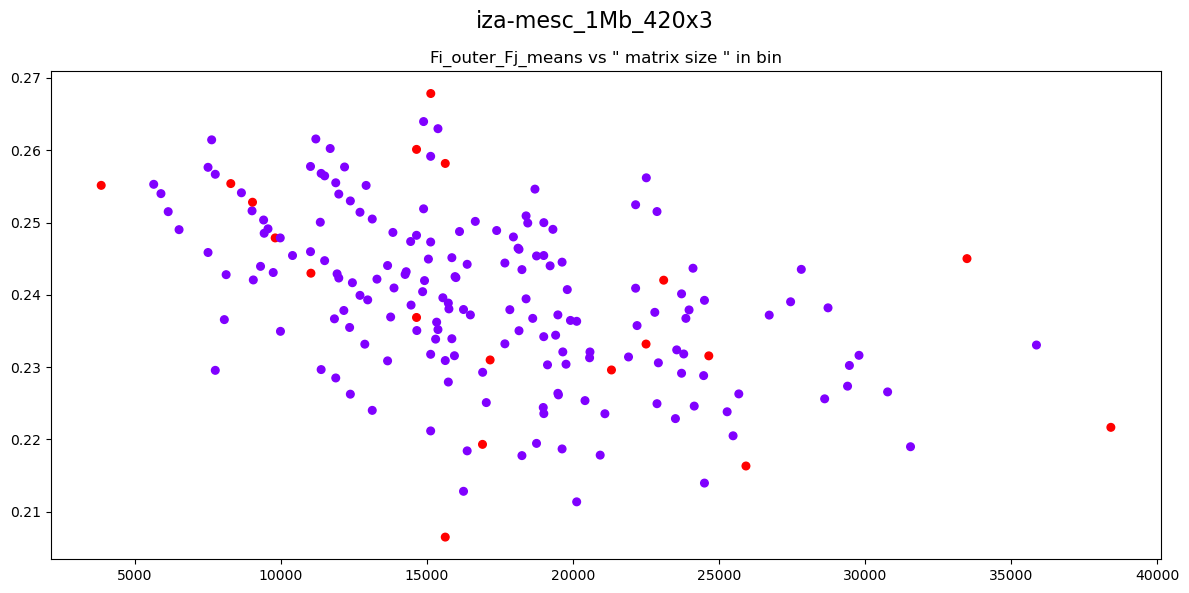

In [241]:
fig, ax = plt.subplots(figsize = (12,6))

x_1 = []
y_1 = []
diagonal_labels = []

for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(outer_means[i,j])
            if(i == j):
                diagonal_labels.append(1)
            else:
                diagonal_labels.append(0)




chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1,  diagonal_labels]).T, columns=['x', 'y1',  'color'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


ax.scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 1], s = 30, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')


ax.set_title("Fi_outer_Fj_means vs \" matrix size \" in bin")


fig.suptitle(name_root_3NP_1Mb, fontsize=16)

fig.tight_layout()

# $F_{i,j} (F_i , F_j)$ in 1NP #

In [247]:
path_1 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_1NP_1Mb + "/"
file_name_1 = "segregation_" + name_root_1NP_1Mb +  ".pkl"
with open(path_1 + file_name_1, 'rb') as f_1:
    segregation_table_1NP = pickle.load(f_1)

gw_coseg_matrix_1NP_1Mb, gw_norm_link_disq_1NP_1Mb = compute_coseg_nld_genomewide(segregation_table_1NP, 1, 19)

gw_coseg_matrix_1NP_1Mb   = np.nan_to_num(gw_coseg_matrix_1NP_1Mb, nan=0)
gw_norm_link_disq_1NP_1Mb = np.nan_to_num(gw_norm_link_disq_1NP_1Mb, nan=0)


for i in range(gw_coseg_matrix_1NP_1Mb.shape[0]):
    for j in range(gw_coseg_matrix_1NP_1Mb.shape[1]):
        gw_coseg_matrix_1NP_1Mb[j,i]   = gw_coseg_matrix_1NP_1Mb[i,j]
        gw_norm_link_disq_1NP_1Mb[j,i] = gw_norm_link_disq_1NP_1Mb[i, j] 




(150, 2473)
0.23529319906226276


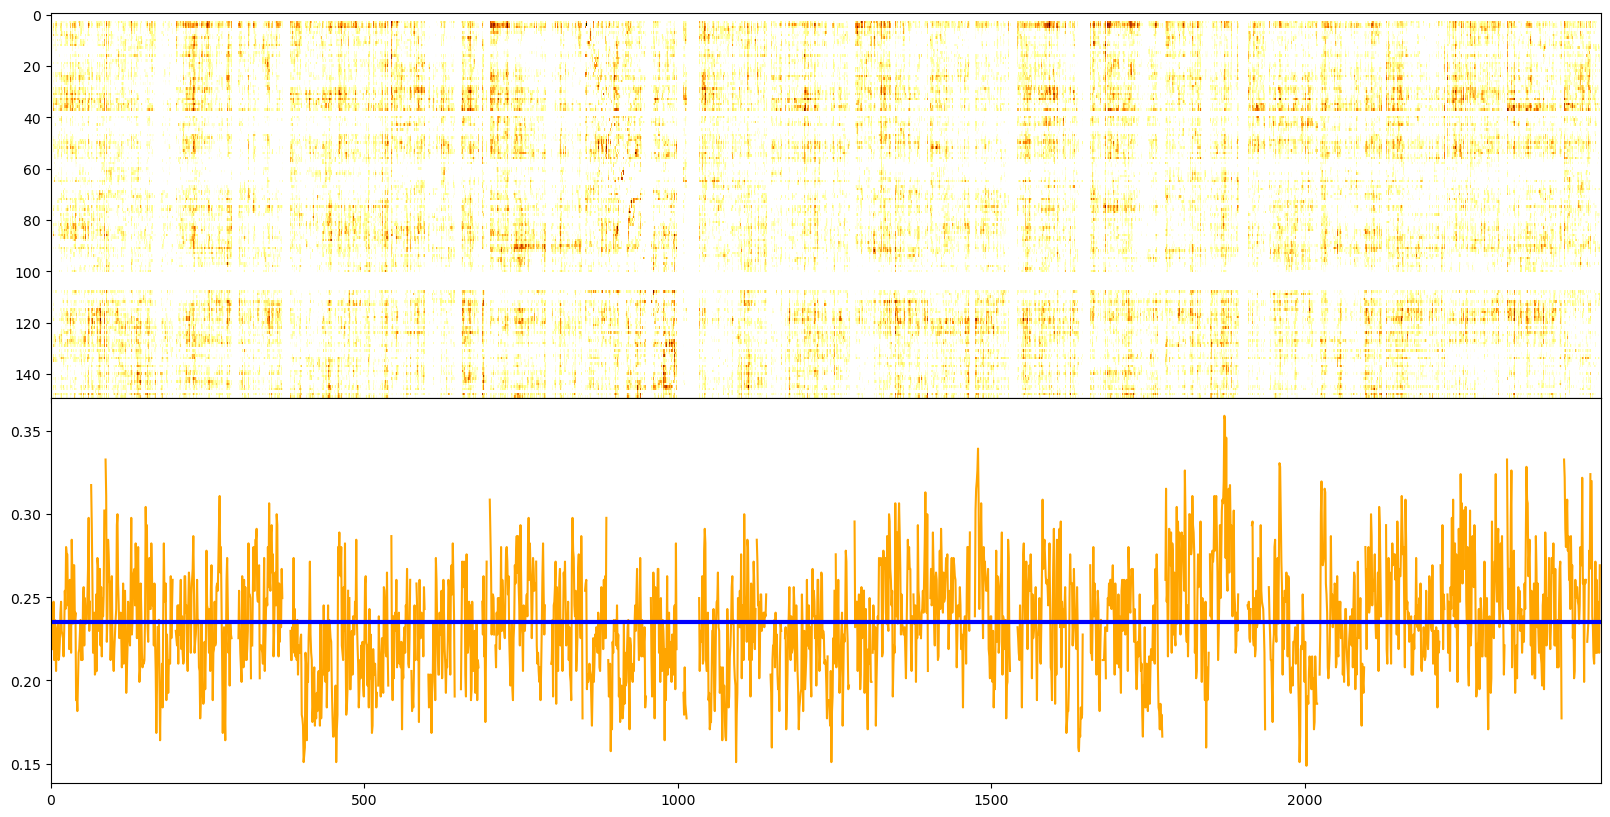

In [249]:
fig, ax = plt.subplots(2, 1, figsize = (20,10), sharex = True)

F_arr_genomewide_1NP_1Mb = np.array([])

#start_row    = np.sum(chr_windows_sizes[:i])
start_row    = np.sum(chr_windows_sizes[:5])
stop_row     = start_row + chr_windows_sizes[5]

start_column = 0
stop_column  = np.sum(chr_windows_sizes[:18]) + chr_windows_sizes[18]

print(gw_PI_1NP_1Mb[start_row:stop_row, start_column:stop_column].shape)

ax[0].imshow(gw_PI_1NP_1Mb[start_row:stop_row, start_column:stop_column], cmap = 'afmhot_r', interpolation = 'nearest', aspect = 'auto')

# For each chromosome, compute F_arr and store it in F_arr_genomewide
for chr in chr_list:
    segregation_table = segregation_table_1NP_1Mb[chr]["segregation_table"]
    F_arr = compute_tube_segregation_frequency(segregation_table)
    F_arr_genomewide_1NP_1Mb = np.concatenate((F_arr_genomewide_1NP_1Mb, F_arr))
    del F_arr


ax[1].plot(F_arr_genomewide_1NP_1Mb[start_column:stop_column], color = 'orange')
ax[1].axhline(  np.nanmean(F_arr_genomewide_1NP_1Mb[start_column:stop_column]), color = 'blue', linewidth = 3)
print(np.nanmean(F_arr_genomewide_1NP_1Mb[start_column:stop_column]))
#ax[1].set_title("windows detection frequency | " + name_root_1NP_1Mb, fontsize = 16)
plt.subplots_adjust(wspace=0, hspace=0)
del fig, ax

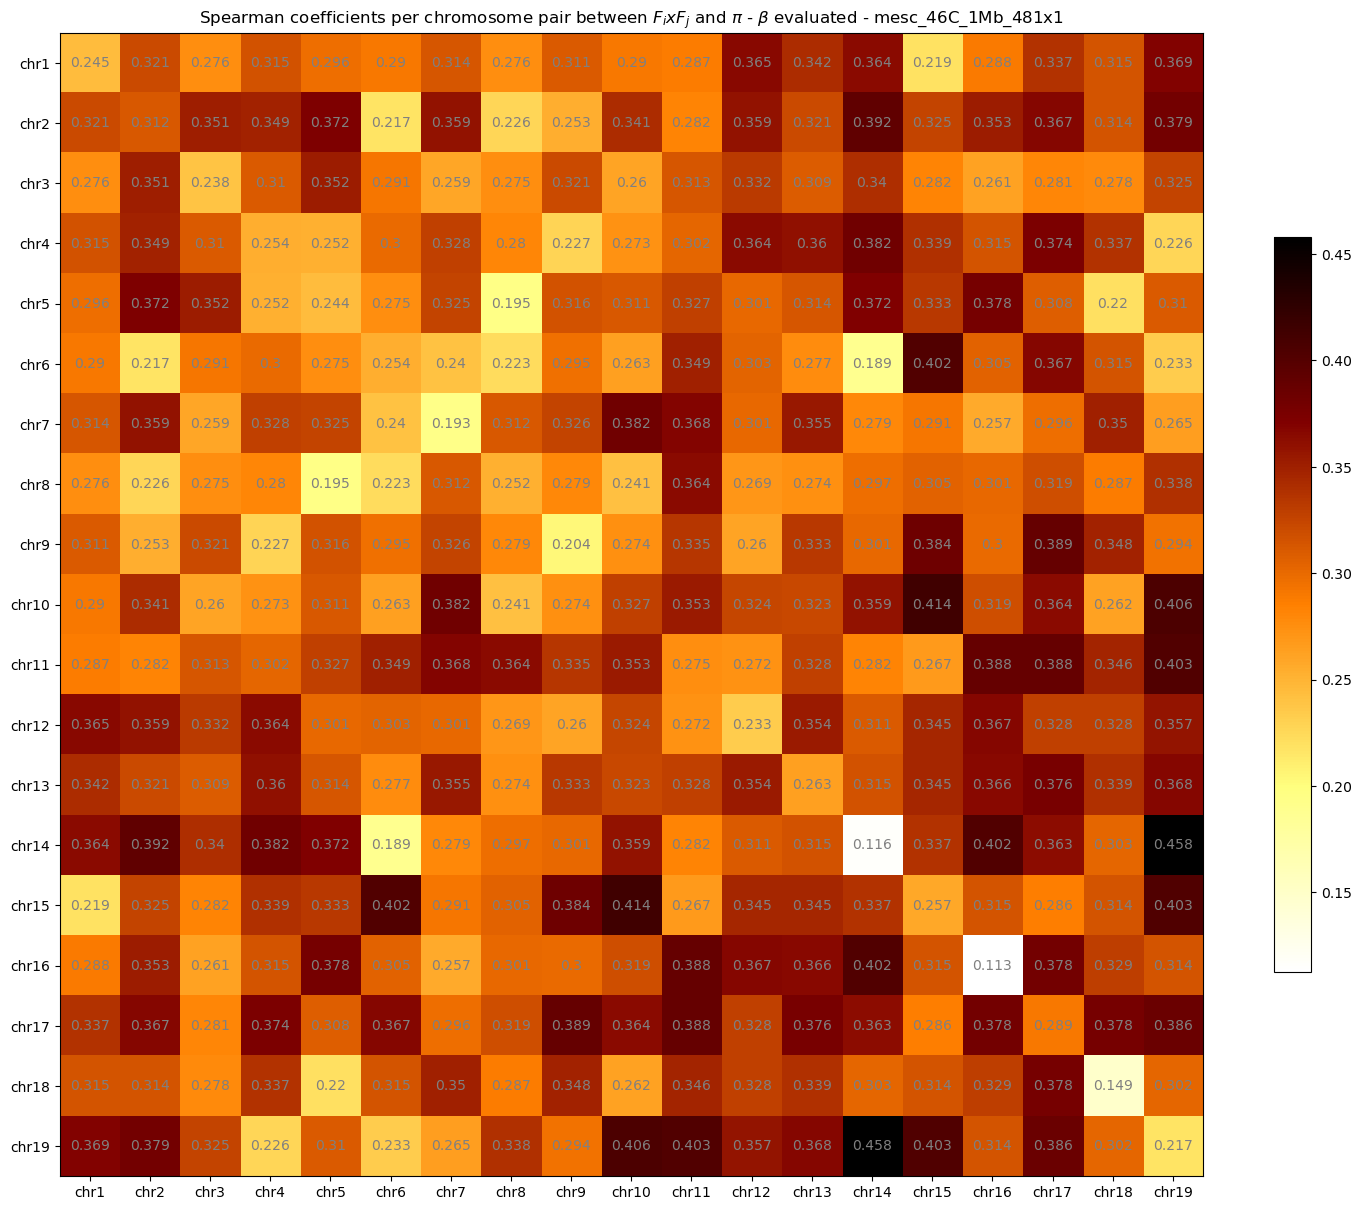

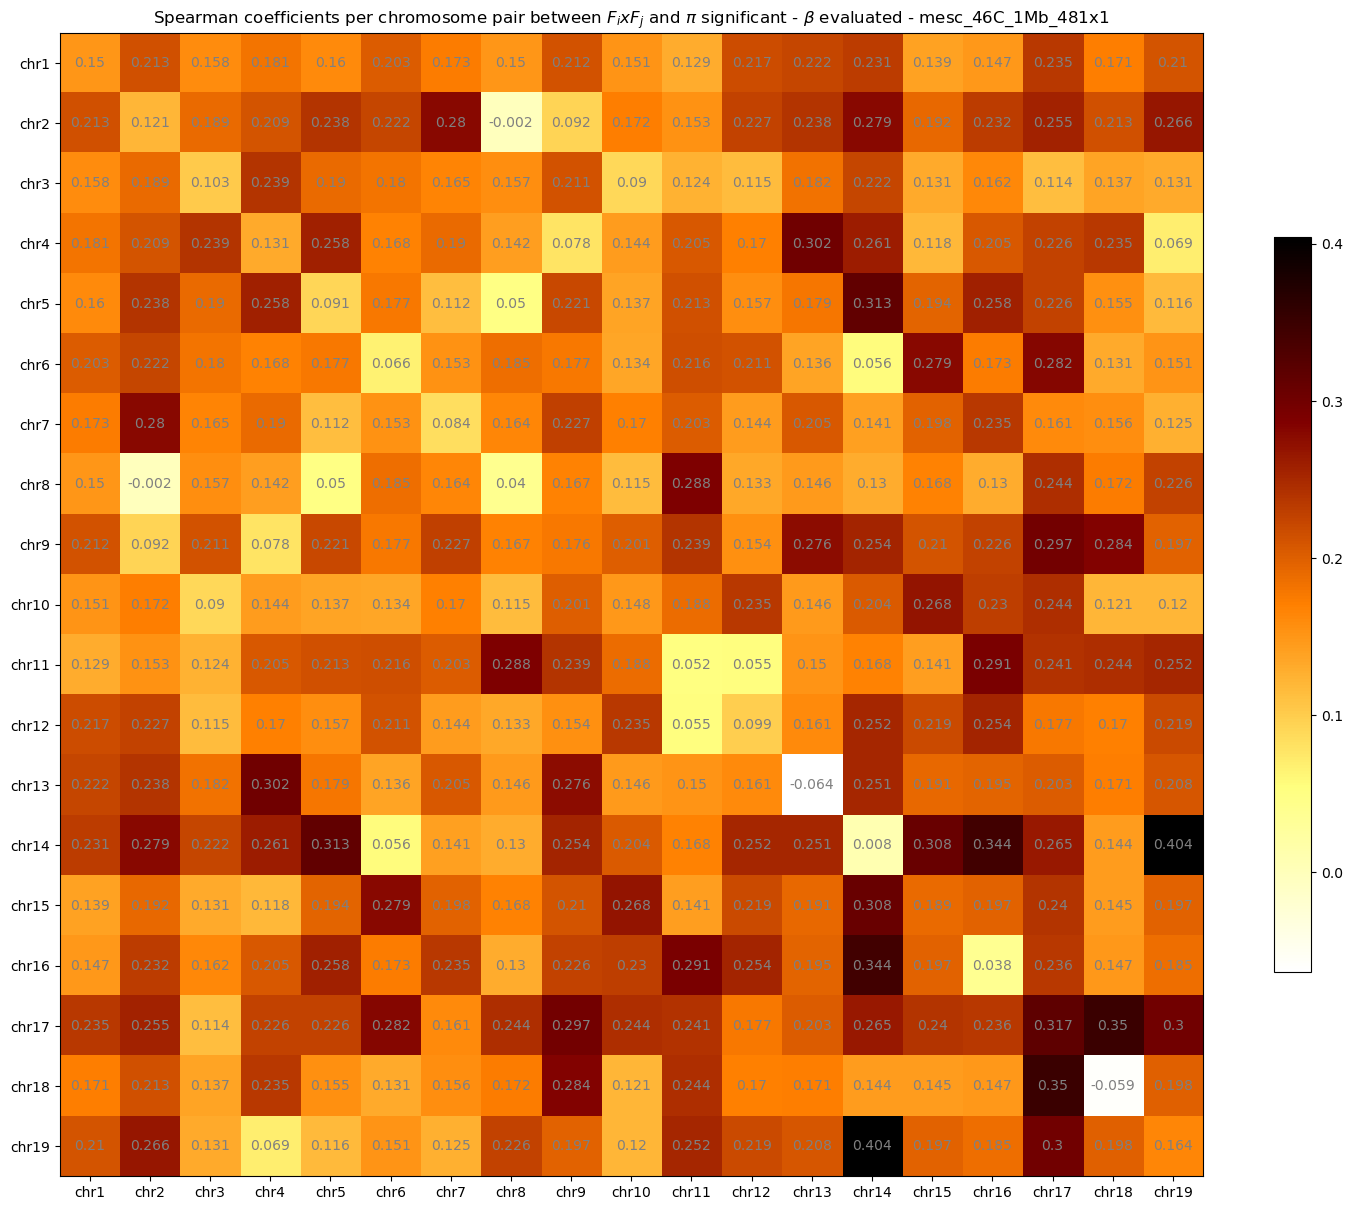

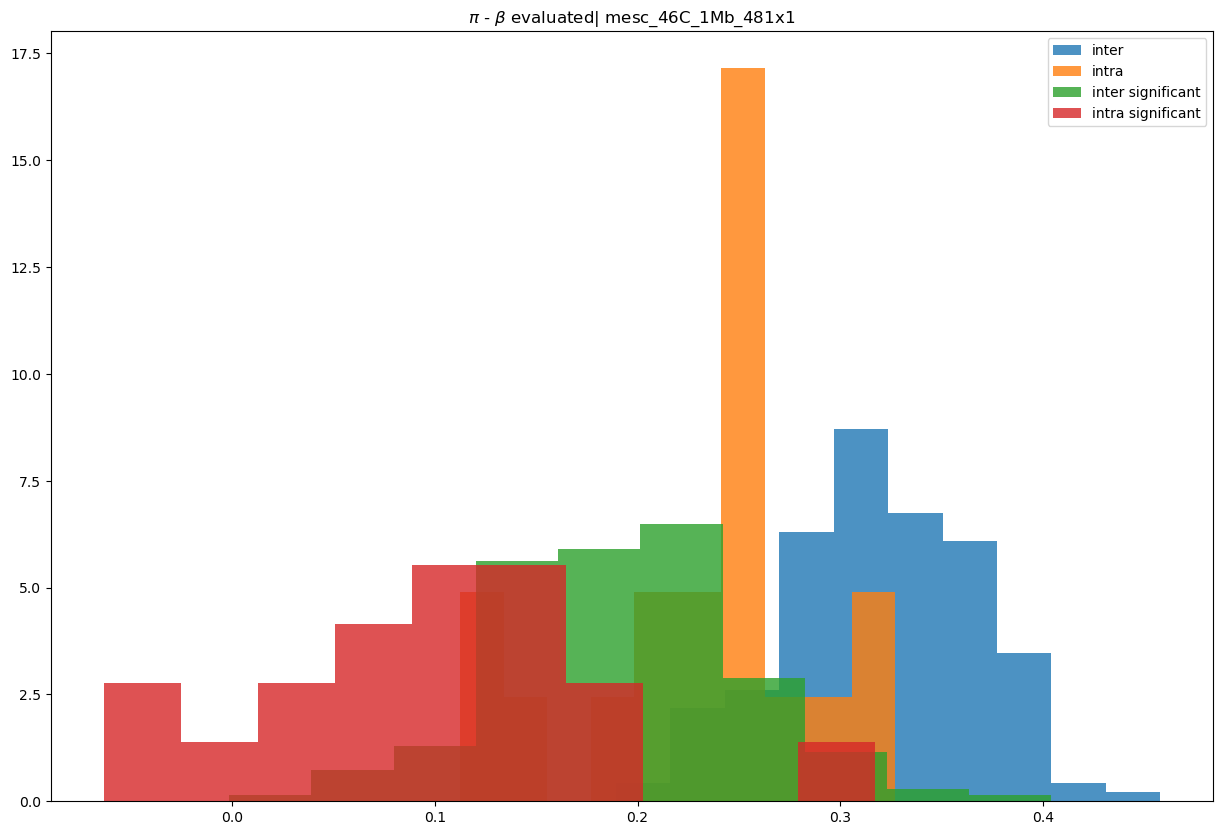

In [250]:
s = gw_PI_1NP_1Mb.shape[0]
F_i_outer_Fj_1NP_1Mb = np.outer(F_arr_genomewide_1NP_1Mb[:s], F_arr_genomewide_1NP_1Mb[:s])
np.fill_diagonal(F_i_outer_Fj_1NP_1Mb, np.nan)

gw_PI_1NP_1Mb_nozero = np.copy(gw_PI_1NP_1Mb)
gw_PI_1NP_1Mb_nozero[gw_PI_1NP_1Mb == 0] = np.nan

gw_PI_95_significant_1NP_1Mb_nozero = np.copy(gw_PI_95_significant_1NP_1Mb)
gw_PI_95_significant_1NP_1Mb_nozero[gw_PI_95_significant_1NP_1Mb == 0] = np.nan

spearmans = np.zeros((19,19))
significant_spearmans = np.zeros((19,19))
#spearmans = np.zeros((19,19))

for i in tqdm(range(n_chromosomes), leave = False):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]

        spearmans[i, j] = spearmanr(F_i_outer_Fj_1NP_1Mb[start_row:stop_row, start_column:stop_column].flatten(), gw_PI_1NP_1Mb_nozero[start_row:stop_row, start_column:stop_column].flatten(), nan_policy='omit')[0]
        significant_spearmans[i, j] = spearmanr(F_i_outer_Fj_1NP_1Mb[start_row:stop_row, start_column:stop_column].flatten(), gw_PI_95_significant_1NP_1Mb_nozero[start_row:stop_row, start_column:stop_column].flatten(), nan_policy='omit')[0]
        

#del F_i_outer_Fj_1NP_1Mb

fig, ax = plot_heatmap(spearmans, x_figsize= 15, y_figsize= 15)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, np.around(spearmans[i, j], decimals=3),
                       ha="center", va="center", color="grey")

ax.set_title("Spearman coefficients per chromosome pair between $F_i x F_j$ and $\pi$ - " + which_beta + " - " + name_root_1NP_1Mb)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);

fig1, ax1 = plot_heatmap(significant_spearmans, x_figsize= 15, y_figsize= 15)

for i in range(19):
    for j in range(19):
        text = ax1.text(j, i, np.around(significant_spearmans[i, j], decimals=3),
                       ha="center", va="center", color="grey")

ax1.set_title("Spearman coefficients per chromosome pair between $F_i x F_j$ and $\pi$ significant - " + which_beta + " - " + name_root_1NP_1Mb)
fig1.tight_layout()
ax1.set_xticks(np.arange(0,19, 1))
ax1.set_yticks(np.arange(0,19, 1))
ax1.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax1.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);


del fig, ax, fig1, ax1


from scipy.spatial.distance import squareform

off_diag_spearmans = np.copy(spearmans)
np.fill_diagonal(off_diag_spearmans, 0)

off_diag_significant_spearmans = np.copy(significant_spearmans)
np.fill_diagonal(off_diag_significant_spearmans, 0)



fig, ax = plt.subplots(figsize = (15,10))
#ax.hist(np.diagonal(spearmans));
ax.hist(squareform(off_diag_spearmans), density=True, alpha = 0.8, label = "inter");
ax.hist(np.diagonal(spearmans), density=True, alpha = 0.8, label = "intra");
ax.legend();
ax.set_title("$\pi$ -" + which_beta  + "|" + name_root_1NP_1Mb);

#fig1, ax1 = plt.subplots(figsize = (10,10))
#ax.hist(np.diagonal(spearmans));
ax.hist(squareform(off_diag_significant_spearmans), density=True, alpha = 0.8, label = "inter significant");
ax.hist(np.diagonal(significant_spearmans), density=True, alpha = 0.8, label = "intra significant");
ax.legend();
#ax.set_title("significant $\pi$ 95% -" + which_beta  + "|" + name_root_1NP_1Mb)

del off_diag_spearmans, off_diag_significant_spearmans


## Medie delle F_i_outer_F_j in 1NP ##

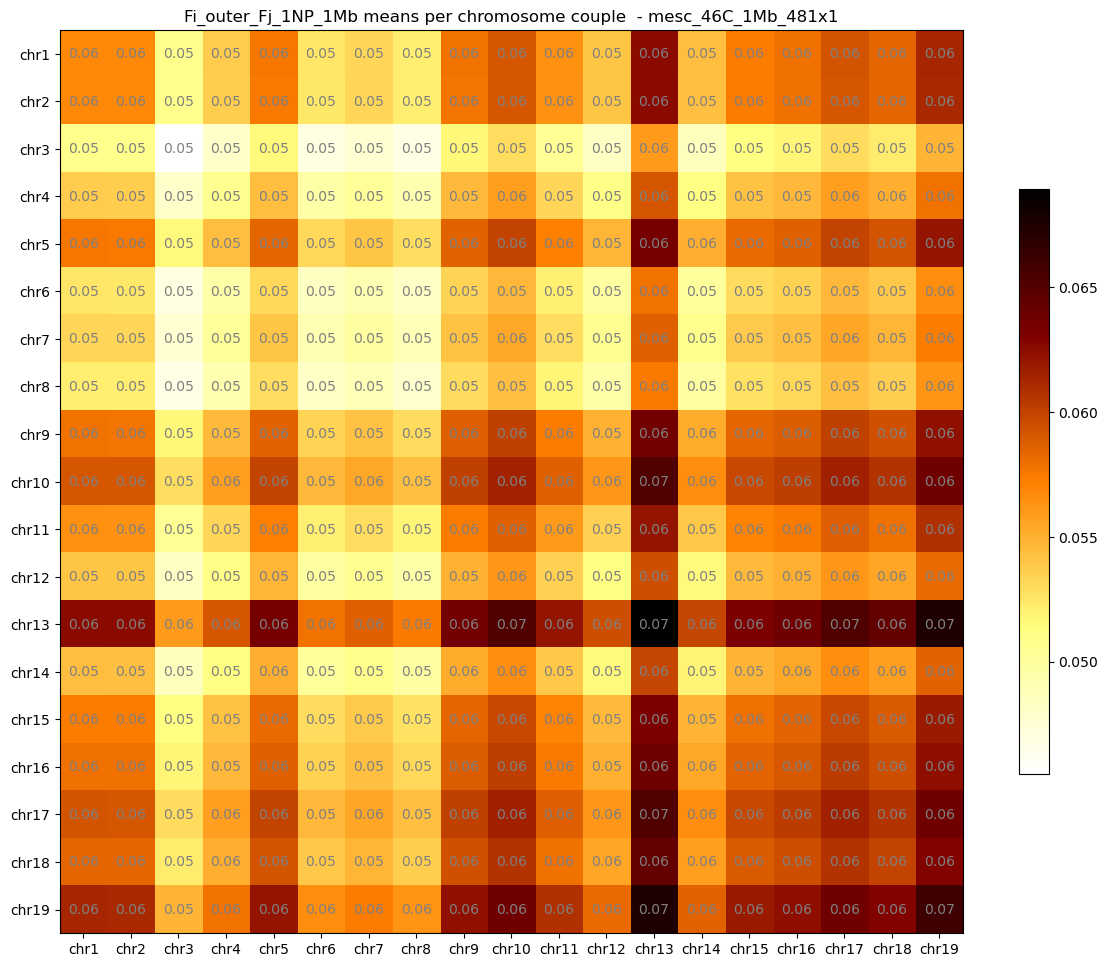

In [251]:
outer_means = np.zeros((19,19))

for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        
        outer_means[i, j] = np.nanmean(F_i_outer_Fj_1NP_1Mb[start_row:stop_row, start_column:stop_column])
    

fig, ax = plot_heatmap(outer_means, x_figsize= 12, y_figsize= 12)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, np.around(outer_means[i, j], decimals=2),
                       ha="center", va="center", color="grey")

ax.set_title("Fi_outer_Fj_1NP_1Mb means per chromosome couple " + " - " + name_root_1NP_1Mb)
fig.tight_layout()
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);

del fig, ax

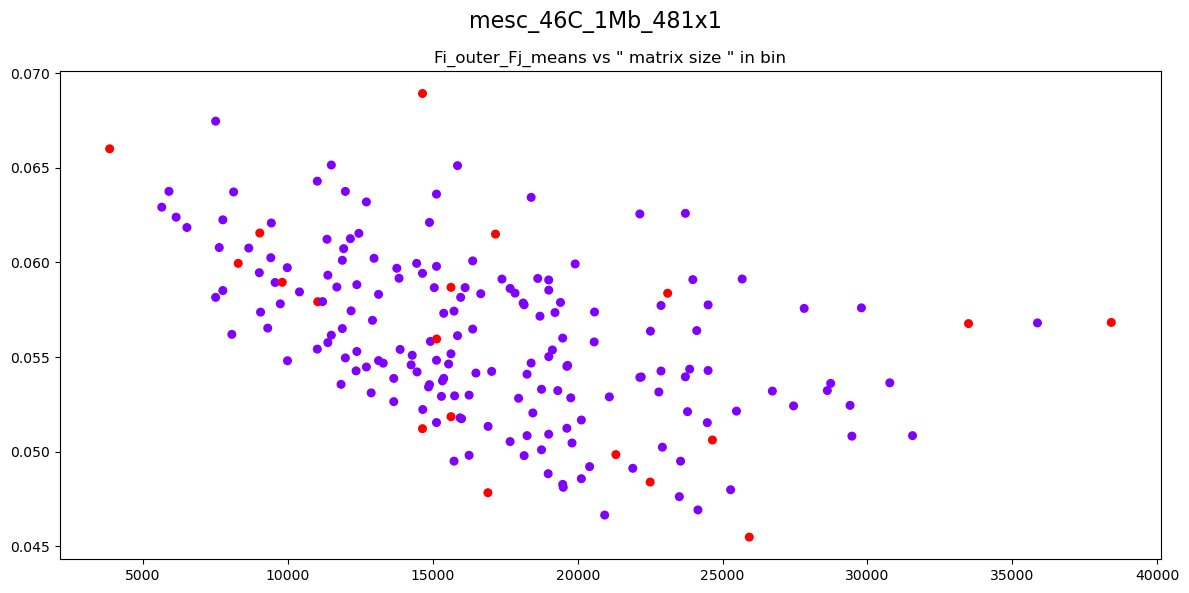

In [252]:
fig, ax = plt.subplots(figsize = (12,6))

x_1 = []
y_1 = []
diagonal_labels = []

for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(outer_means[i,j])
            if(i == j):
                diagonal_labels.append(1)
            else:
                diagonal_labels.append(0)




chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1,  diagonal_labels]).T, columns=['x', 'y1',  'color'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


ax.scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 1], s = 30, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')


ax.set_title("Fi_outer_Fj_means vs \" matrix size \" in bin")


fig.suptitle(name_root_1NP_1Mb, fontsize=16)

fig.tight_layout()

# Statistics of $\pi$ in chr7 and 12 #

In [10]:
s = 3864155
rg = Generator(MT19937(s))
chr7_12_1NP_1Mb_pi, chr7_12_1NP_1Mb_sign_pi = inter_chromosome(segregation_table_1NP_1Mb['chr7']['segregation_table'], segregation_table_1NP_1Mb['chr12']['segregation_table'] , 'chr7', 'chr12', 95, verbose= True, save= False, ret= True, generator = rg)


Computing inter PIs for chr7 and chr12 ...
% of NaN PI values: 27.71991395901732 %
% of PI < 0 (out of non-nans): 49.7219829274023 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 11.723705850105725 %
Mean PI value: 0.05476270845248214
STD PI value: 0.04021029558121318
Mean SIGNIFICATIVE PI value: 0.1128566224984258
STD SIGNIFICATIVE PI value: 0.027436637895690865
Done



In [16]:
s = 3864155
rg = Generator(MT19937(s))
chr7_12_1NP_1Mb_pi, chr7_12_1NP_1Mb_sign_pi = inter_chromosome(segregation_table_1NP_1Mb['chr7']['segregation_table'], segregation_table_1NP_1Mb['chr12']['segregation_table'] , 'chr7', 'chr12', 95, verbose= True, save= False, ret= True, generator = rg)


Computing inter PIs for chr7 and chr12 ...
% of NaN PI values: 27.71991395901732 %
% of PI < 0 (out of non-nans): 49.7219829274023 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 11.942986921450387 %
Mean PI value: 0.05476270845248214
STD PI value: 0.04021029558121318
Mean SIGNIFICATIVE PI value: 0.11228170518217633
STD SIGNIFICATIVE PI value: 0.02750671659310904
Done



In [18]:
select_chromosomes_coordinates(1, 12, chr_windows_sizes=chr_windows_sizes)

(0, 196, 1654, 1775)